In [1]:
import os
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker as plticker
from matplotlib.ticker import ScalarFormatter, AutoMinorLocator #What do these do?
from matplotlib import cm
import seaborn as sns
import plotly.express as px
import numpy as np
import sklearn

In [2]:
sklearn.__version__

'0.24.1'

In [3]:
from platform import python_version

print(python_version())

3.8.8


In [4]:
# Plot styling
#os.environ["PATH"] += os.pathsep + '/usr/bin' # To set latex= True?

plt.style.use('plot_style.txt')

# Textwidth of LaTeX file. Can be determined via \the\textwidth
textwidth = 483.69687

# Decide wether we want to save all figures
save_to_file = True

# Colors
cmap = cm.get_cmap('magma')

# Ticks
loc15 = plticker.MultipleLocator(base=15.0)
loc30 = plticker.MultipleLocator(base=30.0)

In [5]:
def set_size(textwidth, fraction=1, subplots=(1, 1), scale_factor=1, rescale_height=1):
    """Set figure dimensions to avoid scaling in LaTeX.
    
    Based largely on Jack Walton's post on ploting figures with matplotlib and LaTeX:
    https://jwalton.info/Embed-Publication-Matplotlib-Latex/
    
    Input:
        textwidth: float or string
                Document width in points, or string of predined document type
        fraction: float, optional
                Fraction of the width which you wish the figure to occupy
        subplots: array-like, optional
                The number of rows and columns of subplots.
        scale_factor: Facto to scale width and height with
        rescale_height: Factor to rescale height
    Returns:
        fig_dim: tuple
                Dimensions of figure in inches
    """
    if textwidth == 'paper':
        # Textwidth of LaTeX file. Can be determined by typing
        # \the\textwidth
        # in your latex file and then compiling.
        width_pt = 483.69687
    elif textwidth == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = textwidth

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (scale_factor*fig_width_in, rescale_height*scale_factor*fig_height_in)

# Config

In [6]:
directory = '/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/'
#directory1 = directory + 'test_meas_data2/logP11_P12_532'
#directory1 = '/data/project/general/aerosolretriev/aerosol_results_d/hs_preprocessing/exp_ang_1wl_64'

# 1 WL
#directory1 = '/data/project/general/aerosolretriev/aerosol_results_d/hs_report/1wl_64'
directory1 = directory + 'paper_results_scan_AAE/version1'
# 2 WL
#directory1 = '/data/project/general/aerosolretriev/aerosol_results_d/hs_report/2wl_30'

# 3 WL
#directory1 = '/data/project/general/aerosolretriev/aerosol_results_d/hs_report/3wl_14'

In [7]:
plot_dir = directory1 + '/plots/hyperparameter_scans_paper'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)
result_dir = directory1
model_dir = directory1 +'/model'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

In [8]:
result_dir

'/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/paper_results_scan_AAE/version1'

# Load data

In [9]:
df = pd.read_csv(f'{result_dir}/results.csv', index_col=0)

In [10]:
config_columns = [col for col in df.columns if col.startswith('config/')]
config_column_labels = {col: col.replace('config/', '') for col in config_columns if col != 'datafile'}

In [11]:
df['r2_val_dvar']

0     0.878322
1     0.914809
2     0.872498
3     0.900301
4     0.969604
5     0.957873
6     0.911501
7     0.911746
8     0.957892
9     0.884652
10    0.893786
11    0.912573
12    0.885217
13    0.884876
14    0.838278
15    0.889476
16    0.968318
17    0.893639
18    0.862405
19    0.963082
20    0.876498
21    0.990662
22    0.991587
23    0.854947
24    0.968670
25    0.968777
26    0.905072
Name: r2_val_dvar, dtype: float64

# Plot

## Generalisation of $R^2$

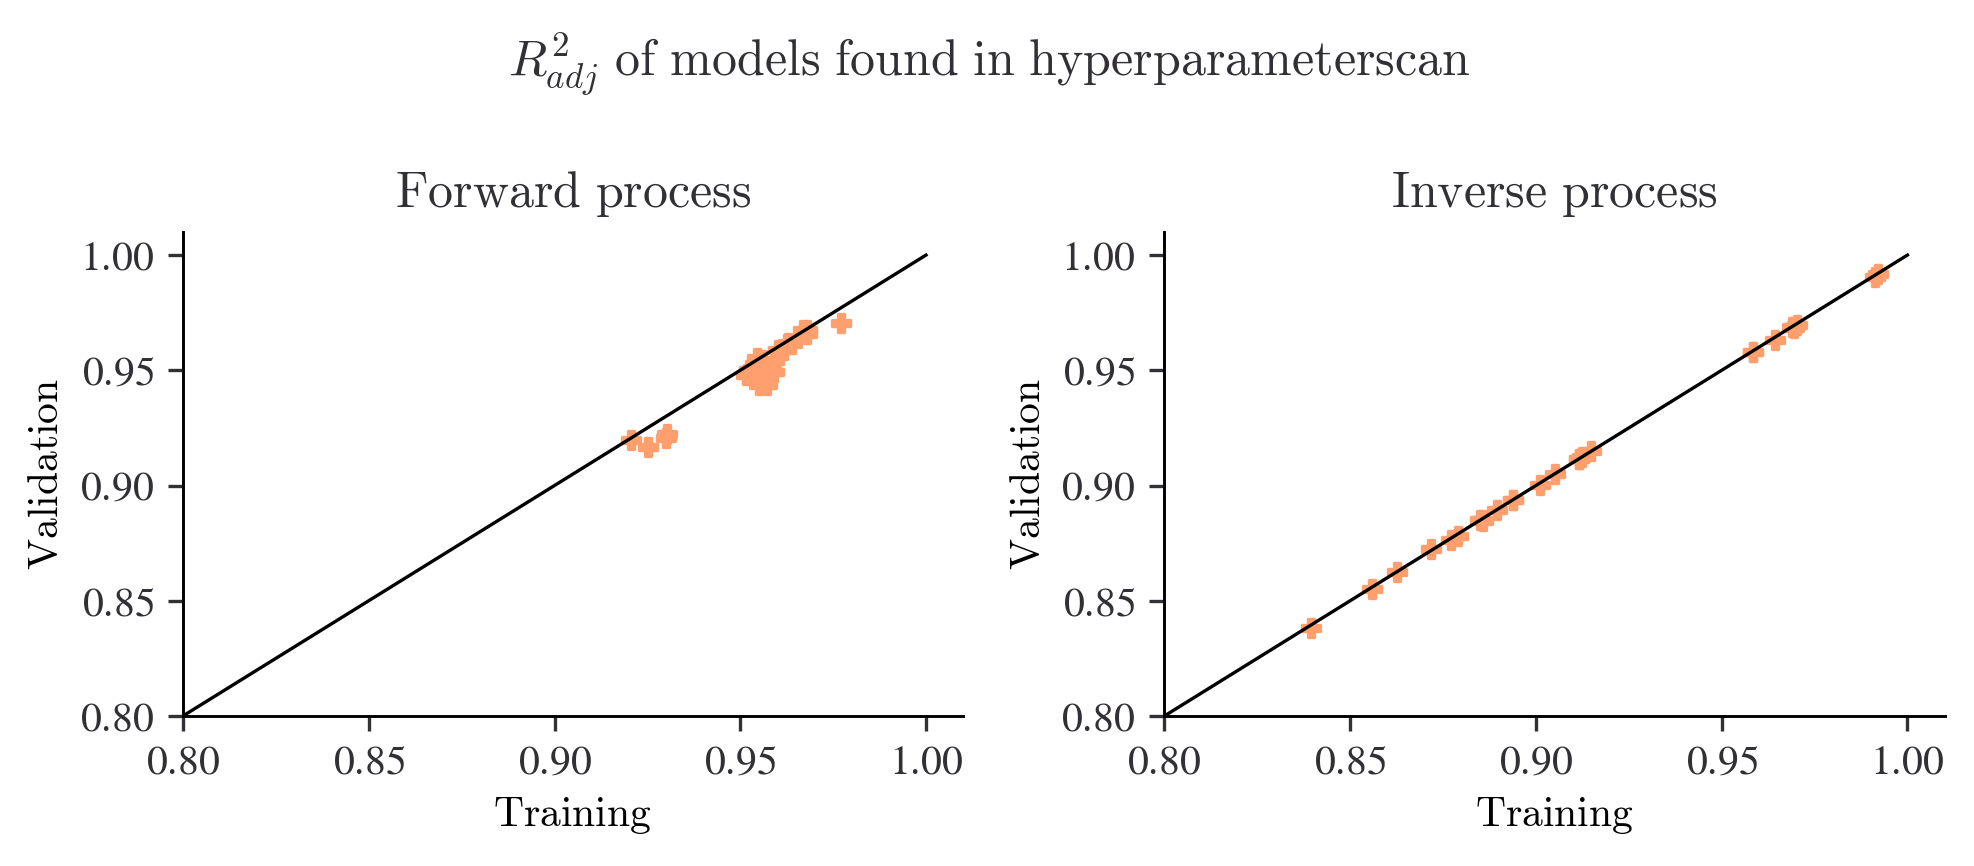

In [12]:
scat_style = {'s': 20, 'marker': 'P', 'alpha': 1, 'linewidths': 0.8}
color = [cmap(0.8), cmap(0.3)]

figsize = set_size(textwidth, subplots=(1, 2), rescale_height=1.4)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=figsize)
ax_limes = [0.8, 1.01]
fig.suptitle("$R^2_{adj}\ \operatorname{of\ models\ found\ in\ hyperparameterscan}$")

ax = axs[0]
#sns.scatterplot(data=df, x='r2_adj_train', y='r2_adj_val', ax=ax)
ax.scatter(df['r2_adj_train'], df['r2_adj_val'], color=color[0], **scat_style)
ax.plot([-1.5, 1.], [-1.5, 1.], color='black')
# ax.annotate(xy=(0.8, 0.8),
#             xytext=(0.1, 0.8),
#             text='Perfect generalisation',
#             arrowprops={
#                 'arrowstyle': '->'
#             })
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$\operatorname{Training}$ ')
ax.set_ylabel(r'$\operatorname{Validation}$')
ax.set_title("$\operatorname{Forward\ process}$")
ax.tick_params()
ax.set_xlim(ax_limes)
ax.set_ylim(ax_limes)

ax = axs[1]
ax.scatter(df['r2_adj_train_dvar'], df['r2_adj_val_dvar'], color=color[0], **scat_style)
#ax.scatter(df, x='r2_adj_train_dvar', y='r2_adj_val_dvar')
ax.plot([-1.5, 1.], [-1.5, 1.], color='black')
# ax.annotate(xy=(0.8, 0.8),
#             xytext=(0.1, 0.8),
#             text='Perfect generalisation',
#             arrowprops={
#                 'arrowstyle': '->'
#             })
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title("$\operatorname{Inverse\ process}$")
ax.set_xlabel(r'$\operatorname{Training}$ ') #R^2_{adj} \ 
ax.set_ylabel(r'$\operatorname{Validation}$')
ax.tick_params()
ax.set_xlim(ax_limes)
ax.set_ylim(ax_limes)

fig.tight_layout()
#fig.savefig(f'{plot_dir}/R2_generalisation_hs.pdf')

## Relationship between $R^2$ and rel. error

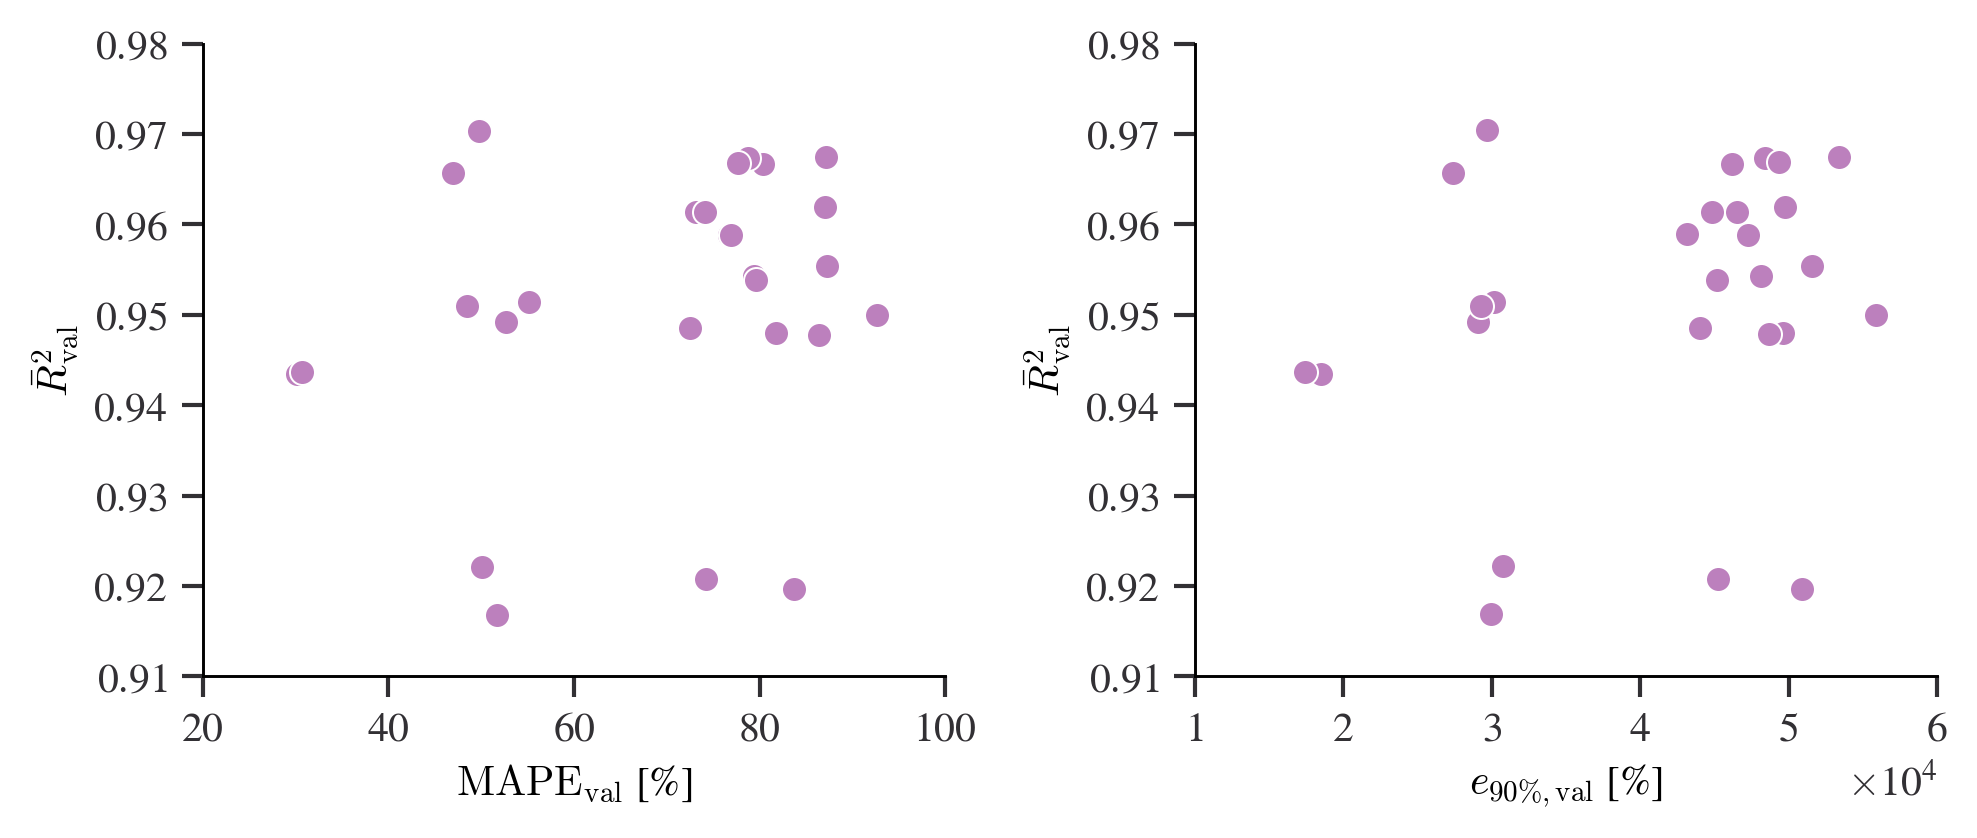

In [13]:
figsize = set_size(textwidth, subplots=(1, 2), rescale_height=1.4)

fig, axes = plt.subplots(1, 2, figsize=figsize)

ax = axes[0]
sns.scatterplot(data=df, x='MAPE_val', y='r2_adj_val', ax=ax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$\mathrm{MAPE}_\mathrm{val}$ [%]')
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$')

ax = axes[1]
sns.scatterplot(data=df, x='90_percentile_max_error_val', y='r2_val', ax=ax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'$e_\mathrm{90\%, val}$ [%]')
ax.set_ylabel(r'$\bar{R}^2_\mathrm{val}$')

for ax in axes:
    ax.tick_params(width=1, length=5)

fig.tight_layout()
fig.savefig(f'{plot_dir}/R2_vs_rel_errors.jpg')

# Best configs

In [14]:
df['config/datafile'][0]

'/data/user/boiger_r/aerosol/aerosol_data/raw_data_AAE/pre_log_ts-0.2_wl-450-532-630_sc-None_qoi-ScatteringData/training_dataset.hdf5'

In [15]:
df.keys()

Index(['MAE_train', 'MAE_val', 'MAPE_train', 'MAPE_val', 'MSE_train',
       'MSE_val', 'median_percentile_max_error_train',
       'median_percentile_max_error_val', '90_percentile_max_error_train',
       '90_percentile_max_error_val', 'r2_train', 'r2_val', 'r2_adj_train',
       'r2_adj_val', 'MAE_train_dvar', 'MAE_val_dvar', 'MAPE_train_dvar',
       'MAPE_val_dvar', 'MSE_train_dvar', 'MSE_val_dvar',
       'median_percentile_max_error_train_dvar',
       'median_percentile_max_error_val_dvar',
       '90_percentile_max_error_train_dvar',
       '90_percentile_max_error_val_dvar', 'r2_train_dvar', 'r2_val_dvar',
       'r2_adj_train_dvar', 'r2_adj_val_dvar', 'time_this_iter_s', 'done',
       'timesteps_total', 'episodes_total', 'training_iteration',
       'experiment_id', 'date', 'timestamp', 'time_total_s', 'pid', 'hostname',
       'node_ip', 'time_since_restore', 'timesteps_since_restore',
       'iterations_since_restore', 'trial_id',
       'config/activation_function_last_l

In [16]:
df.sort_values('r2_val_dvar', ascending=False)[config_columns + ['r2_val_dvar','r2_val' ,'MAE_val', 'median_percentile_max_error_val', '90_percentile_max_error_val']].rename(columns=config_column_labels).head(5)

activation_function_last_layer activation_functions_inbetween  batch_size  \
22                         linear                           relu           8   
21                         linear                           relu           8   
4                          linear                           relu           8   
25                         linear                           relu           8   
24                         linear                           relu           8   

                                             datafile  epochs  learning_rate  \
22  /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
21  /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
4   /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
25  /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   
24  /data/user/boiger_r/aerosol/aerosol_data/raw_d...      50        0.00009   

    n_blocks  n_depth  n_width  nominal_dimension  ... weight_reconstruction  \
22         3        2       92               1082  ...                   308   
21         3        2       92               1082  ...                   258   
4          3        2       92               1082  ...                   308   
25         3        2       92               1082  ...                   308   
24         3        2       92               1082  ...                   258   

   weight_x weight_y  weight_z  y_noise  r2_val_dvar    r2_val   MAE_val  \
22      146      350       339      0.1     0.991587  0.943717  0.048329   
21      146      350       339      0.1     0.990662  0.943467  0.046383   
4       146      350       330      0.1     0.969604  0.951425  0.062392   
25      142      350       339      0.1     0.968777  0.951010  0.063115   
24      142      350       339      0.1     0.968670  0.949257  0.061978   

    median_percentile_max_error_val  90_percentile_max_error_val  
22                      2048.099307                 17413.937377  
21                      2089.469883                 18488.236770  
4                       3548.316907                 30172.143648  
25                      3459.097245                 29276.252478  
24                      3363.486705                 29073.630638  

[5 rows x 24 columns]

## Select best configs

In [17]:
best_config = df.sort_values('r2_val_dvar', ascending=False).iloc[0, :]

In [18]:
# 1wl it is the 
#best_config = df.sort_values('r2_val_dvar', ascending=False).iloc[3, :]

# 2wl it is the fourth
#best_config = df.sort_values('r2_val_dvar', ascending=False).iloc[4, :]

# 3wl it was the first
# best_config = df.sort_values('r2_val_dvar', ascending=False).iloc[1, :]

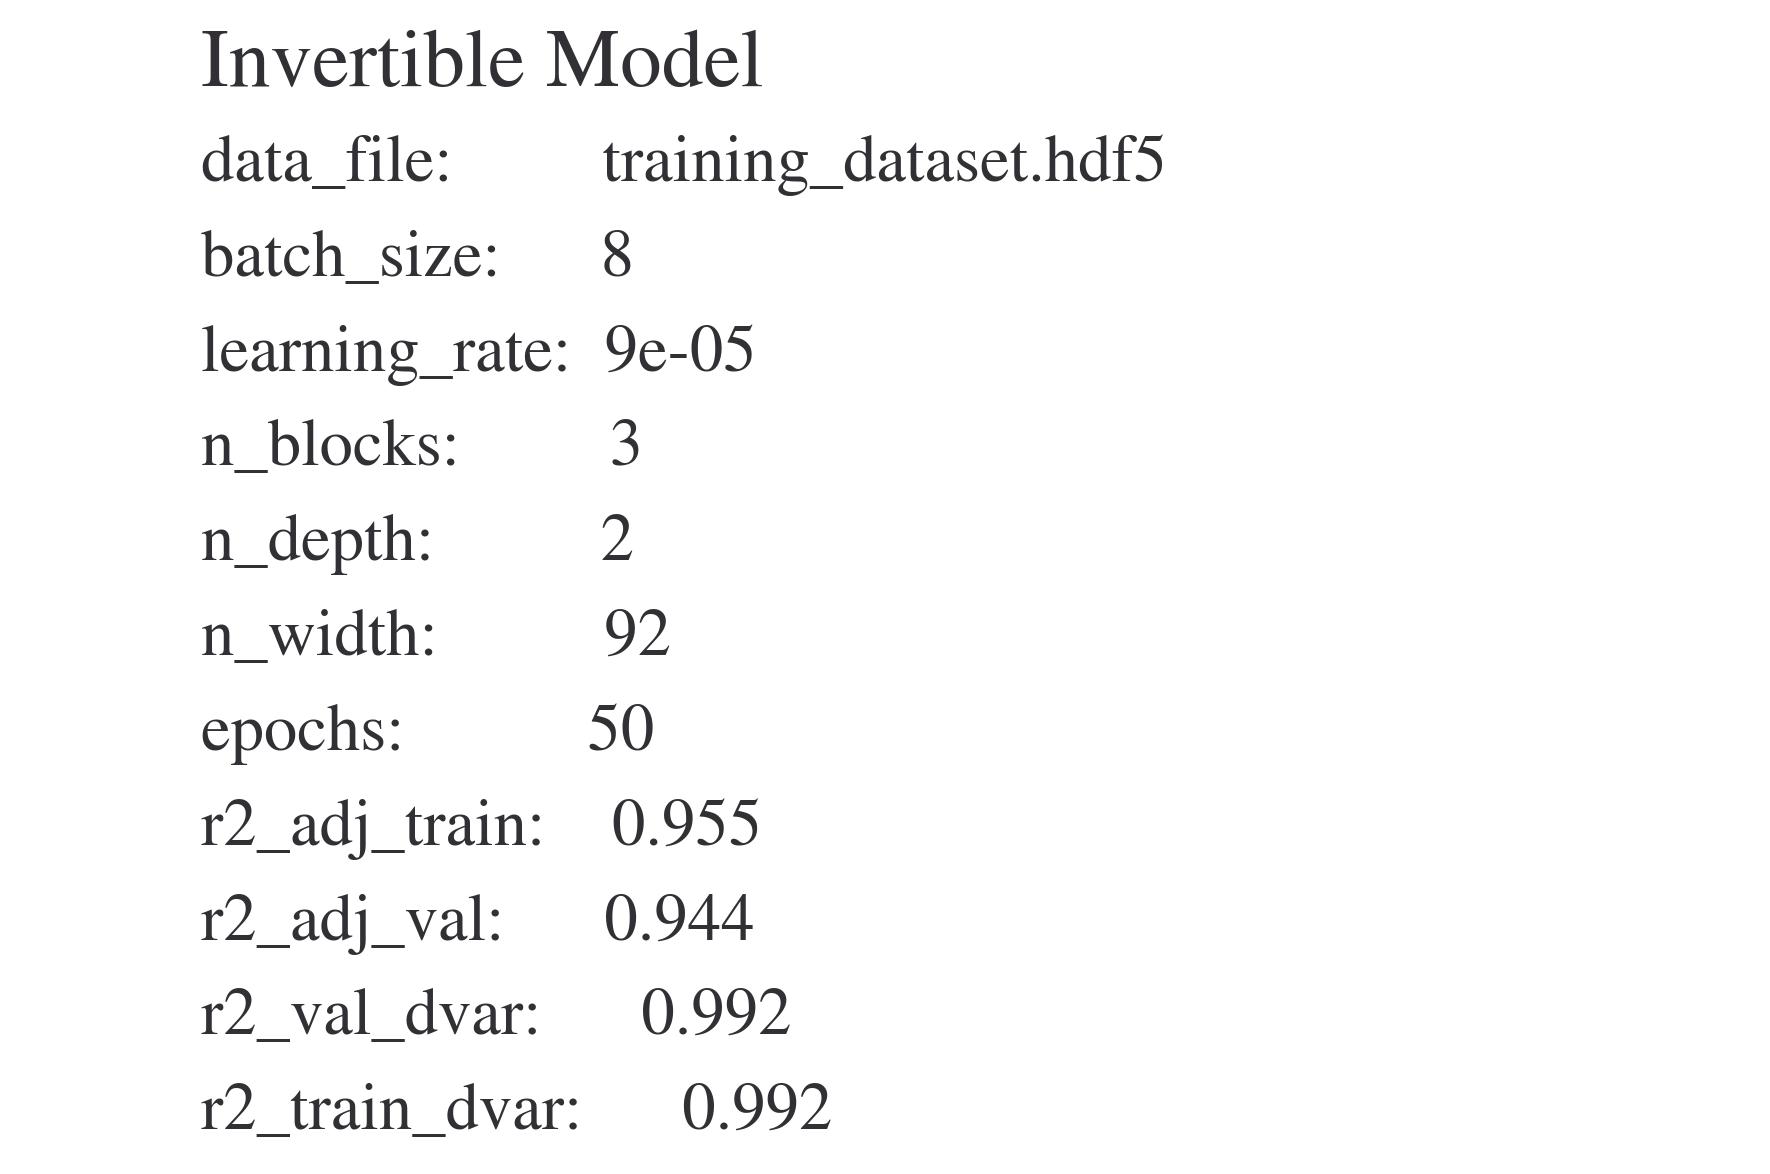

In [19]:
fig, ax = plt.subplots()

ax.annotate(xy=(1, 1),xytext=(0.1, 1),text='Invertible Model',fontsize=20)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.9),text='data_file:         ' +os.path.basename(best_config['config/datafile']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.8),text='batch_size:      ' +str(best_config['config/batch_size']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.7),text='learning_rate:  '+str(best_config['config/learning_rate']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.6),text='n_blocks:         '+str(best_config['config/n_blocks']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.5),text='n_depth:          '+str(best_config['config/n_depth']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.4),text='n_width:          '+str(best_config['config/n_width']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.3),text='epochs:           '+str(best_config['iterations_since_restore']),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.2),text='r2_adj_train:    '+str(np.round(best_config['r2_adj_train'],3)),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.1),text='r2_adj_val:      '+str(np.round(best_config['r2_adj_val'],3)),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, 0.0),text='r2_val_dvar:      '+str(np.round(best_config['r2_val_dvar'],3)),fontsize=16)
ax.annotate(xy=(1, 1),xytext=(0.1, -0.1),text='r2_train_dvar:      '+str(np.round(best_config['r2_train_dvar'],3)),fontsize=16)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

fig.tight_layout()
fig.savefig(f'{plot_dir}/invertible_model_description.jpg',bbox_inches='tight')

In [20]:
print('Invertible Model')
print('data_file:',os.path.basename(best_config['config/datafile']))
print('batch_size:',best_config['config/batch_size'])
print('learning_rate:',best_config['config/learning_rate'])
print('n_blocks:',best_config['config/n_blocks'])
print('n_depth:',best_config['config/n_depth'])
print('n_width:',best_config['config/n_width'])
print('epochs:',best_config['iterations_since_restore'])
print('r2_adj_train:',np.round(best_config['r2_adj_train'],3))
print('r2_adj_val:',np.round(best_config['r2_adj_val'],3))

Invertible Model
data_file: training_dataset.hdf5
batch_size: 8
learning_rate: 9e-05
n_blocks: 3
n_depth: 2
n_width: 92
epochs: 50
r2_adj_train: 0.955
r2_adj_val: 0.944


In [21]:
column_names_scores_fw = {
'r2_train': '$R^2_{train}$',
'r2_val': '$R^2_{val}$',
'r2_adj_train': '$\\bar{R}^2_{train}$',
'r2_adj_val': '$\\bar{R}^2_{val}$',
}
column_names_scores_iv = {
'r2_train_dvar': '$R^2_{train}$',
'r2_val_dvar': '$R^2_{val}$',
'r2_adj_train_dvar': '$\\bar{R}^2_{train}$',
'r2_adj_val_dvar': '$\\bar{R}^2_{val}$',
}

In [22]:
column_names = {
    'config/n_depth': 'Depth',
    'config/n_width': 'Width',
    'config/n_blocks': 'Blocks',    
    'config/weight_x': '$w_{x}$',
    'config/weight_y': '$w_{y}$',
    'config/weight_z': '$w_{z}$',
    'config/weight_artificial': '$w_{p}$',
    'config/weight_reconstruction': '$w_{r}$',    
    'config/y_noise': '$\sigma_{r}$',
    'config/nominal_dimension': 'Nominal dim',    
    'iterations_since_restore': 'Epochs',    
}
best_model_readable = (pd.DataFrame(best_config[[*column_names]]).T).rename(columns=column_names)
best_model_readable

Depth Width Blocks $w_{x}$ $w_{y}$ $w_{z}$ $w_{p}$ $w_{r}$ $\sigma_{r}$  \
22     2    92      3     146     350     339       0     308          0.1   

   Nominal dim Epochs  
22        1082     50

In [23]:
with open(f'{plot_dir}/tables.tex', 'w') as tf:
    tf.write(best_model_readable.to_latex(caption="Best model", position='H', header=True,
                                          index=False, escape=False))
print(best_model_readable.to_latex(caption="Best model", position='H', header=True, 
                                   index=False, escape=False))

\begin{table}[H]
\centering
\caption{Best model}
\begin{tabular}{lllllllllll}
\toprule
Depth & Width & Blocks & $w_{x}$ & $w_{y}$ & $w_{z}$ & $w_{p}$ & $w_{r}$ & $\sigma_{r}$ & Nominal dim & Epochs \\
\midrule
    2 &    92 &      3 &     146 &     350 &     339 &       0 &     308 &          0.1 &        1082 &     50 \\
\bottomrule
\end{tabular}
\end{table}



# Copy the best model to the models directory

In [24]:
best_model_dir = f'{best_config["logdir"]}/surrogate_model'

print("preprocessor_y", best_config["config/preprocessor_y"])
print("preprocessor_x", best_config["config/preprocessor_x"])
print("Model directory:", model_dir)

preprocessor_y <mllib.model.standardscaler.StandardScaler object at 0x2ba54bf1d490>
preprocessor_x <mllib.model.minmaxscaler.AdaptiveMinMaxScaler object at 0x2ba54bf1d1c0>
Model directory: /data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/paper_results_scan_AAE/version1/model


In [25]:
color = [cmap(0.8), cmap(0.3)]
scat_style = {'s': 12, 'marker': 'P', 'alpha': 0.9, 'linewidths': 0.8}

train_marker = {'markerfacecolor': color[0], 'markeredgecolor': color[0], 'color': color[0],
                'ms': 6, 'alpha': 0.9}
val_marker = {'markerfacecolor': color[1], 'markeredgecolor': color[1], 'color': color[1],
               'ms': 5, 'alpha': 0.9}

In [26]:
best_config['iterations_since_restore']

50

In [27]:
#best_configs[0]['iterations_since_restore']

In [30]:
best_model_folder

'57eb7_00024'

57eb7_00022

Model 
data_file: training_dataset.hdf5
batch_size: 8
learning_rate: 9e-05
n_blocks: 3
n_depth: 2
n_width: 92
epochs: 50
r2_adj_train: 0.955
r2_adj_val: 0.944
57eb7_00021

Model 1
data_file: training_dataset.hdf5
batch_size: 8
learning_rate: 9e-05
n_blocks: 3
n_depth: 2
n_width: 92
epochs: 50
r2_adj_train: 0.957
r2_adj_val: 0.943
57eb7_00004

Model 2
data_file: training_dataset.hdf5
batch_size: 8
learning_rate: 9e-05
n_blocks: 3
n_depth: 2
n_width: 92
epochs: 20
r2_adj_train: 0.956
r2_adj_val: 0.951
57eb7_00025

Model 3
data_file: training_dataset.hdf5
batch_size: 8
learning_rate: 9e-05
n_blocks: 3
n_depth: 2
n_width: 92
epochs: 20
r2_adj_train: 0.958
r2_adj_val: 0.951
57eb7_00024

Model 4
data_file: training_dataset.hdf5
batch_size: 8
learning_rate: 9e-05
n_blocks: 3
n_depth: 2
n_width: 92
epochs: 20
r2_adj_train: 0.959
r2_adj_val: 0.949


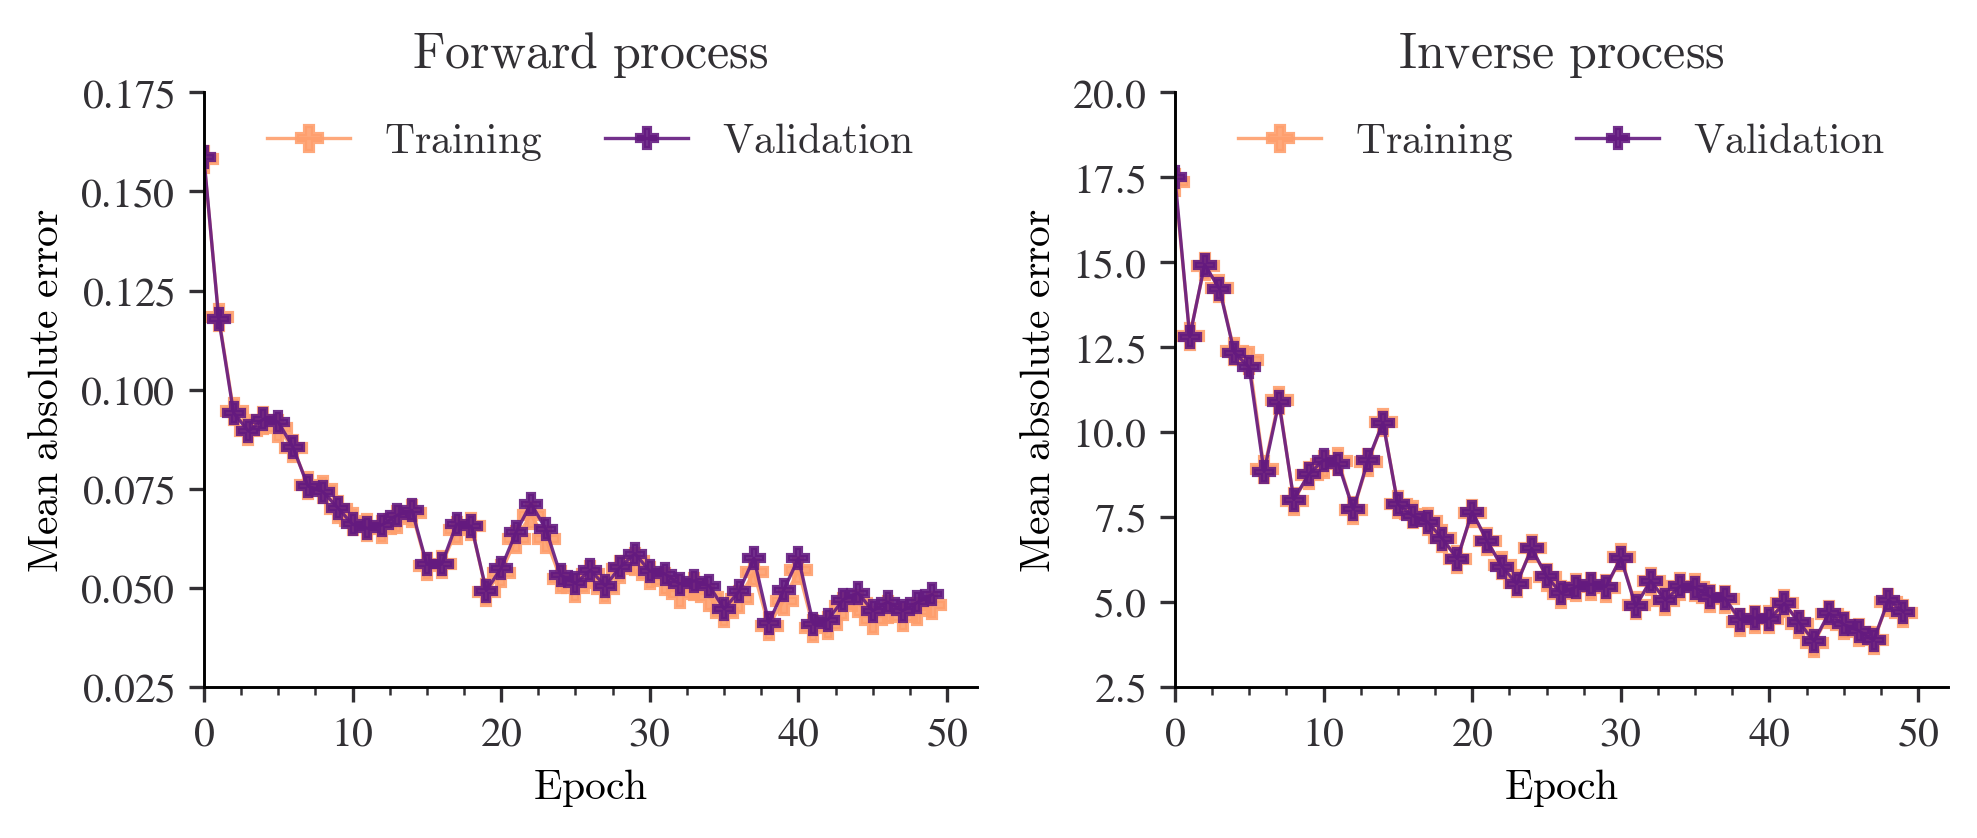

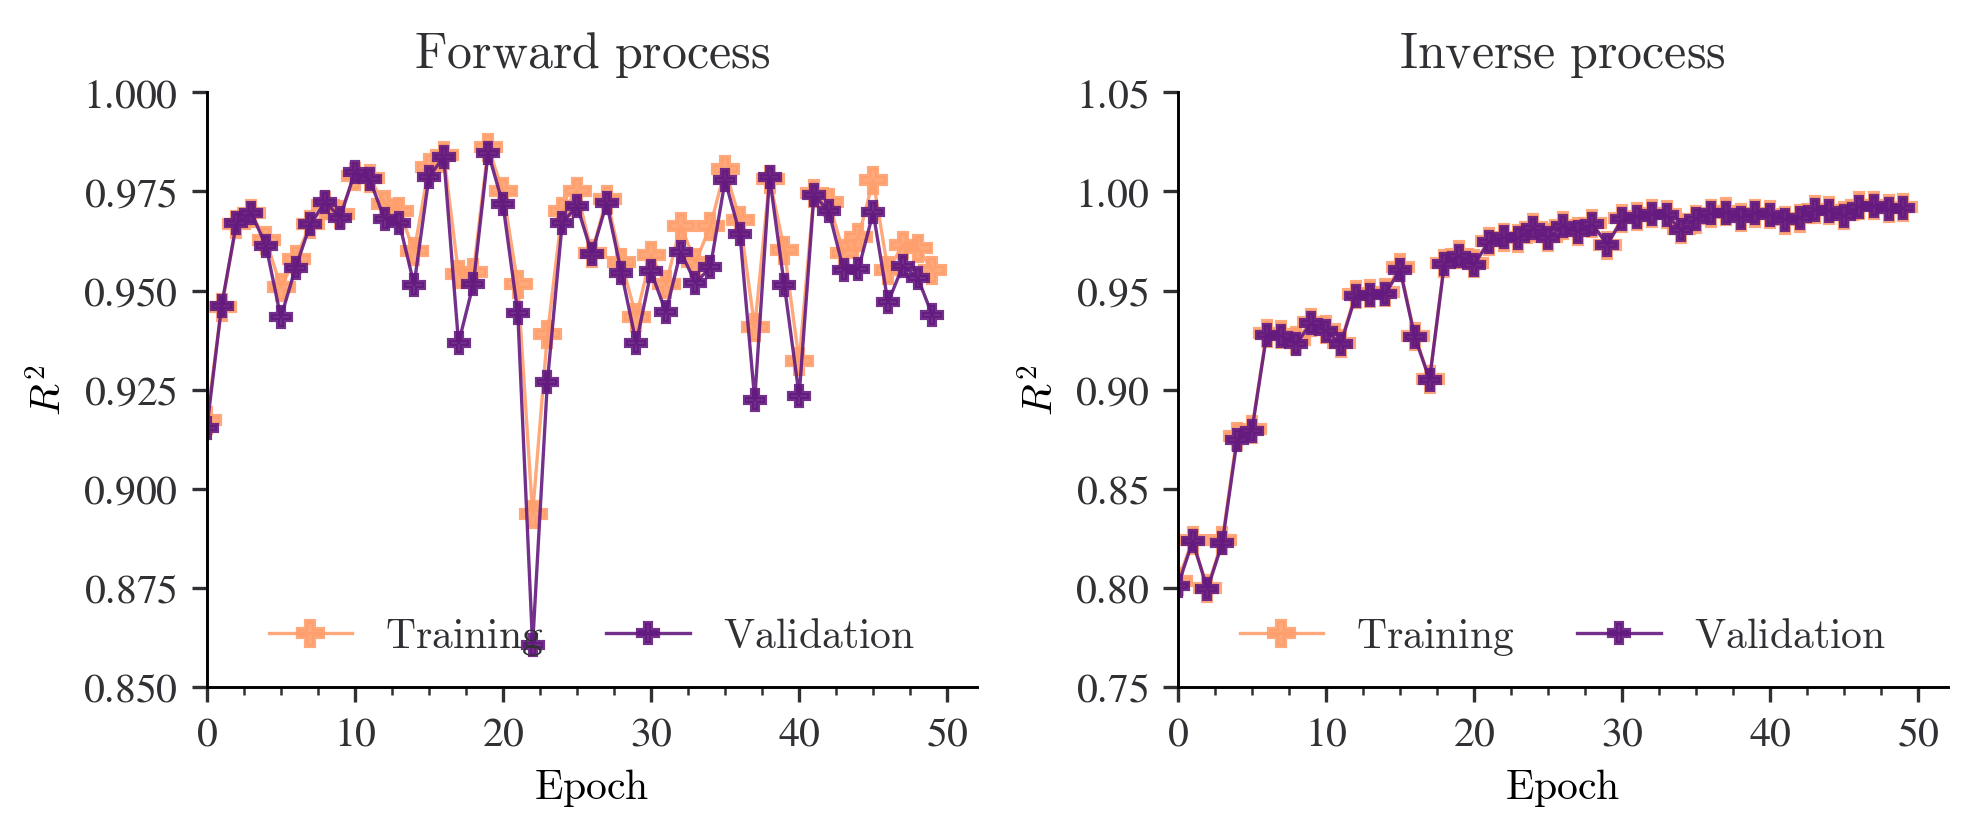

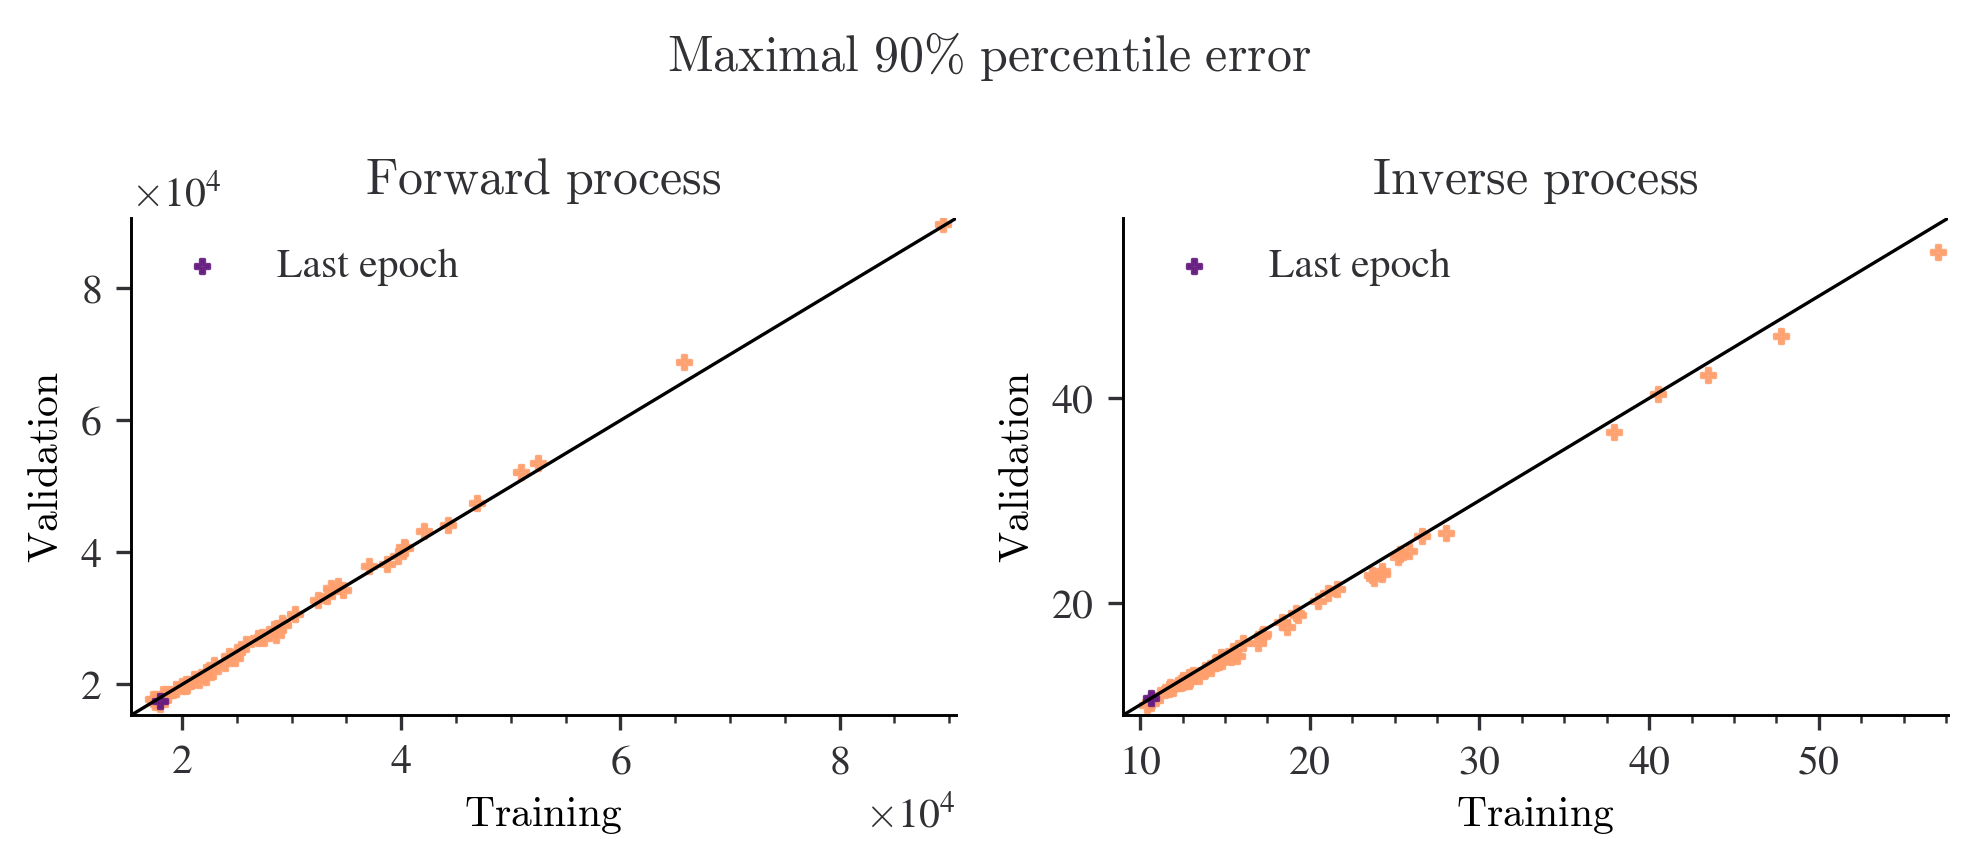

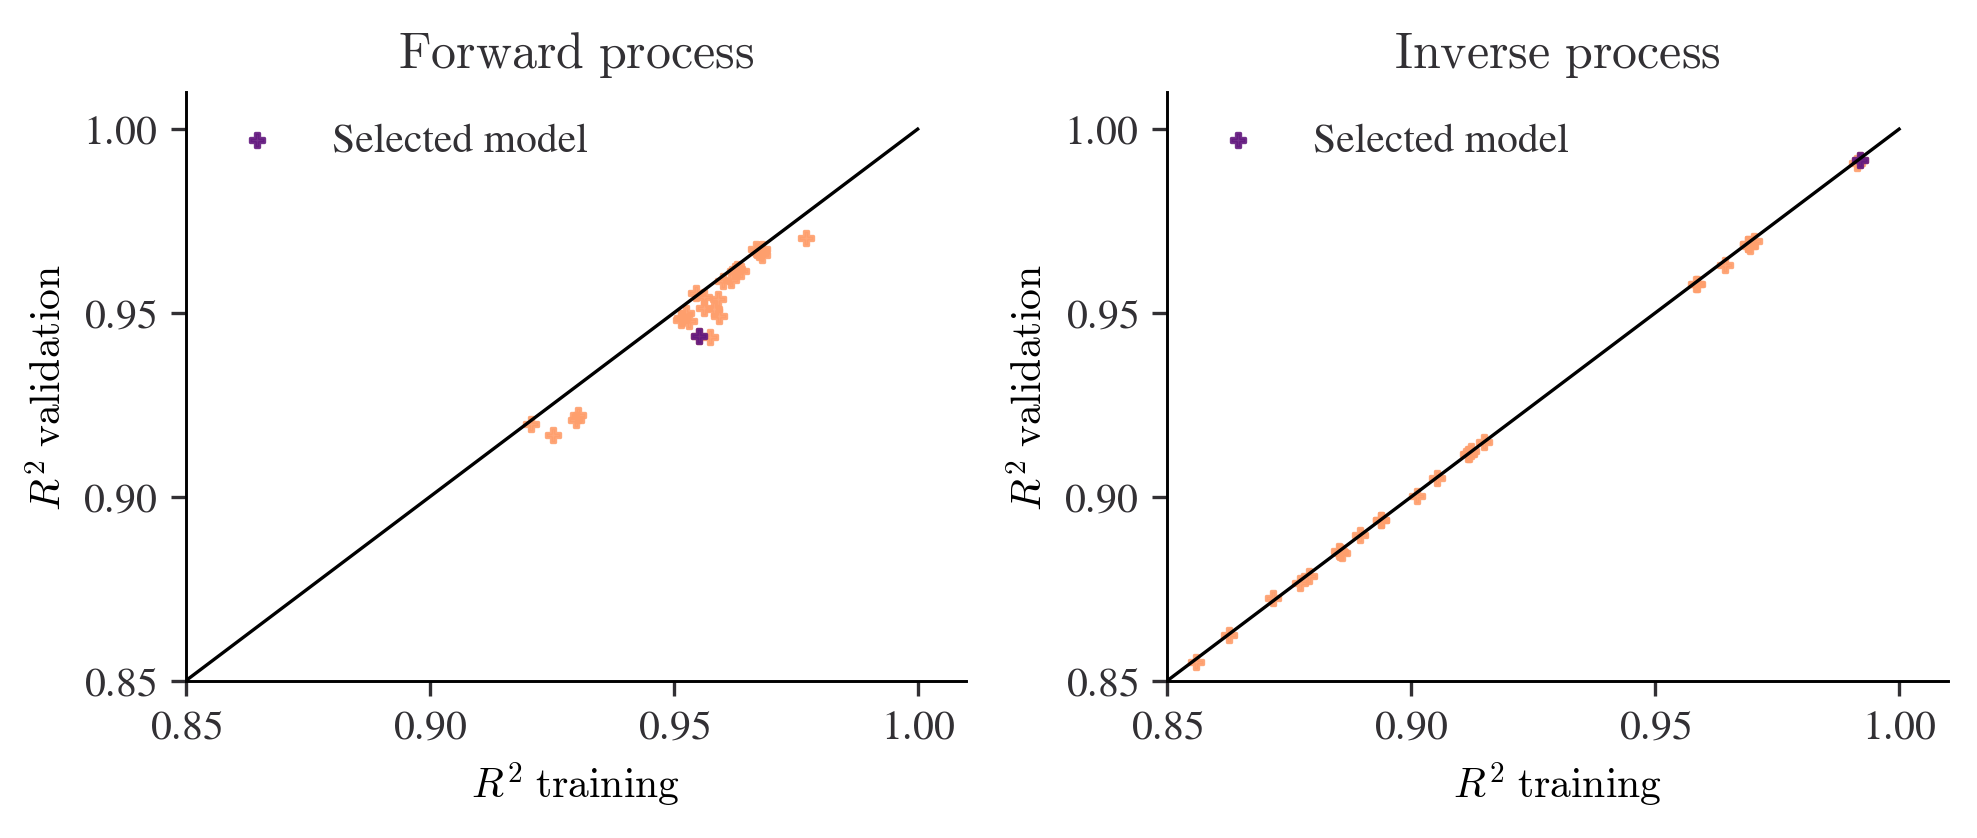

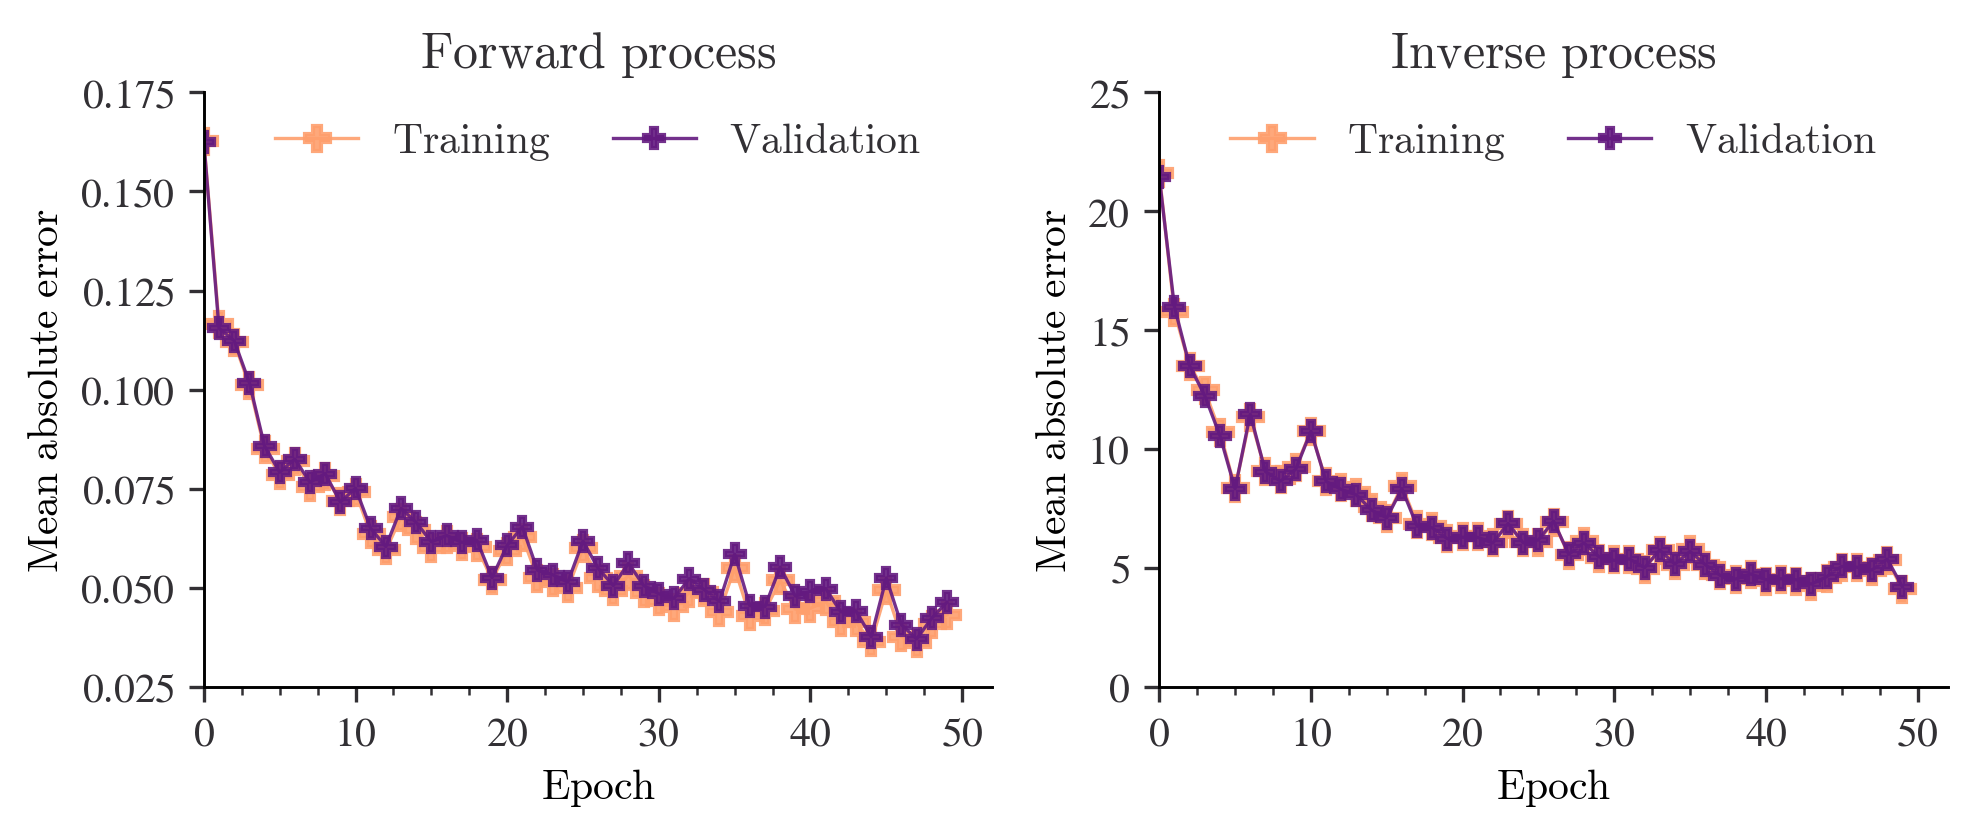

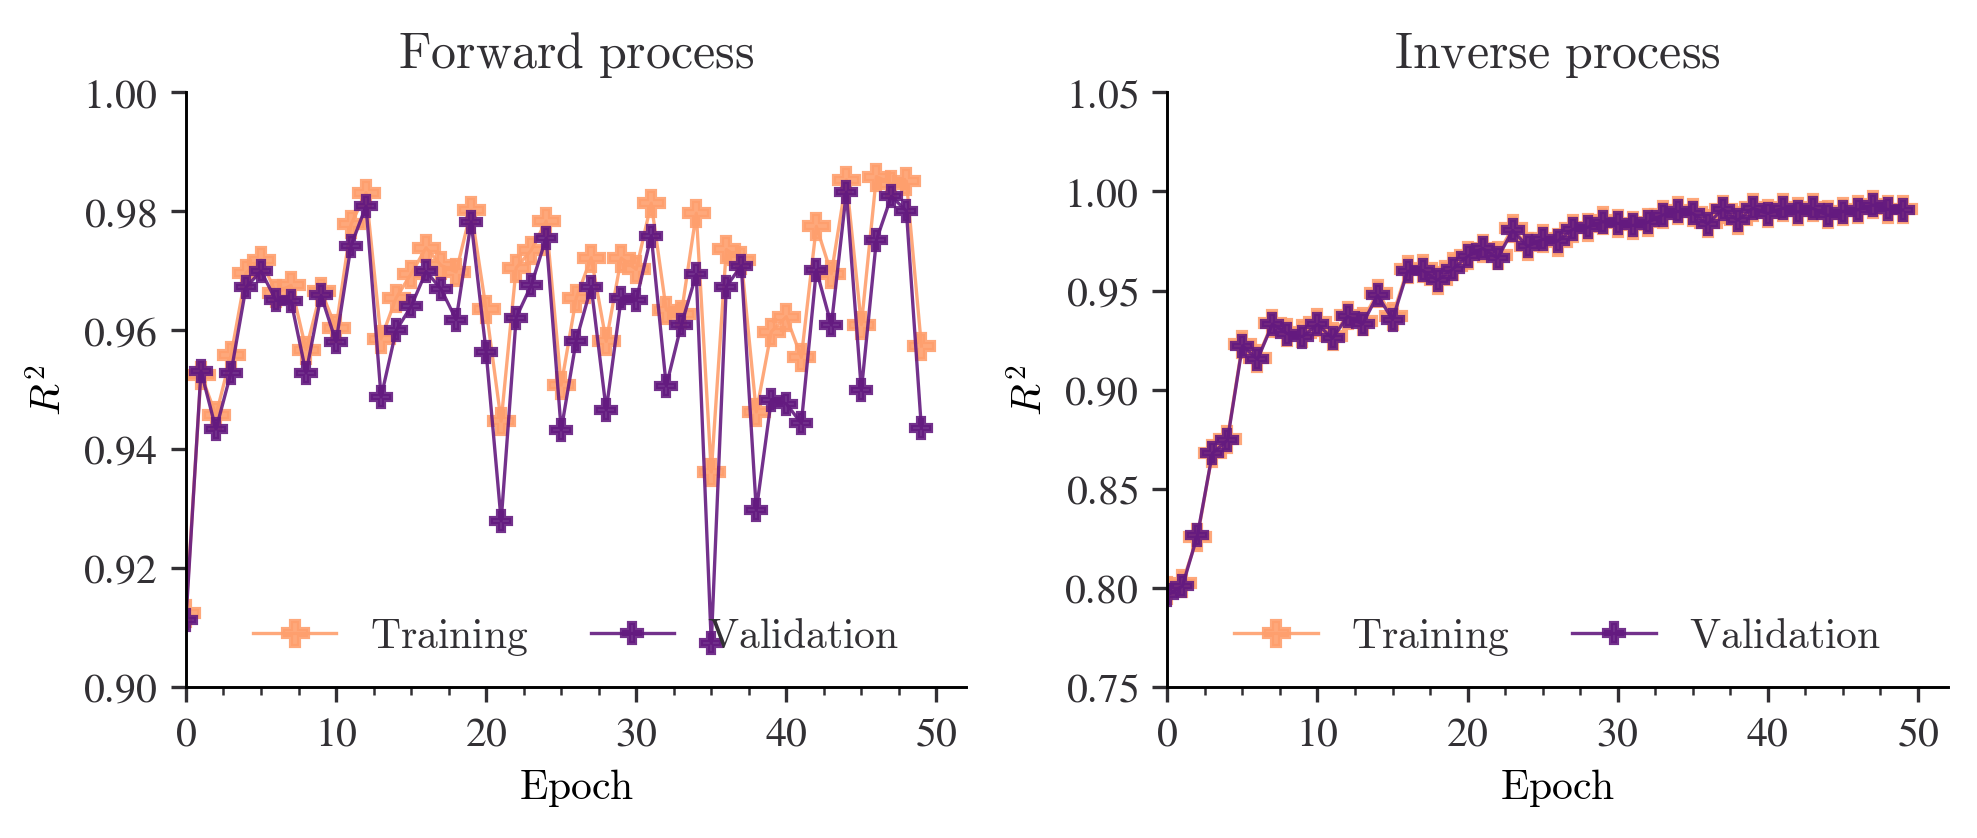

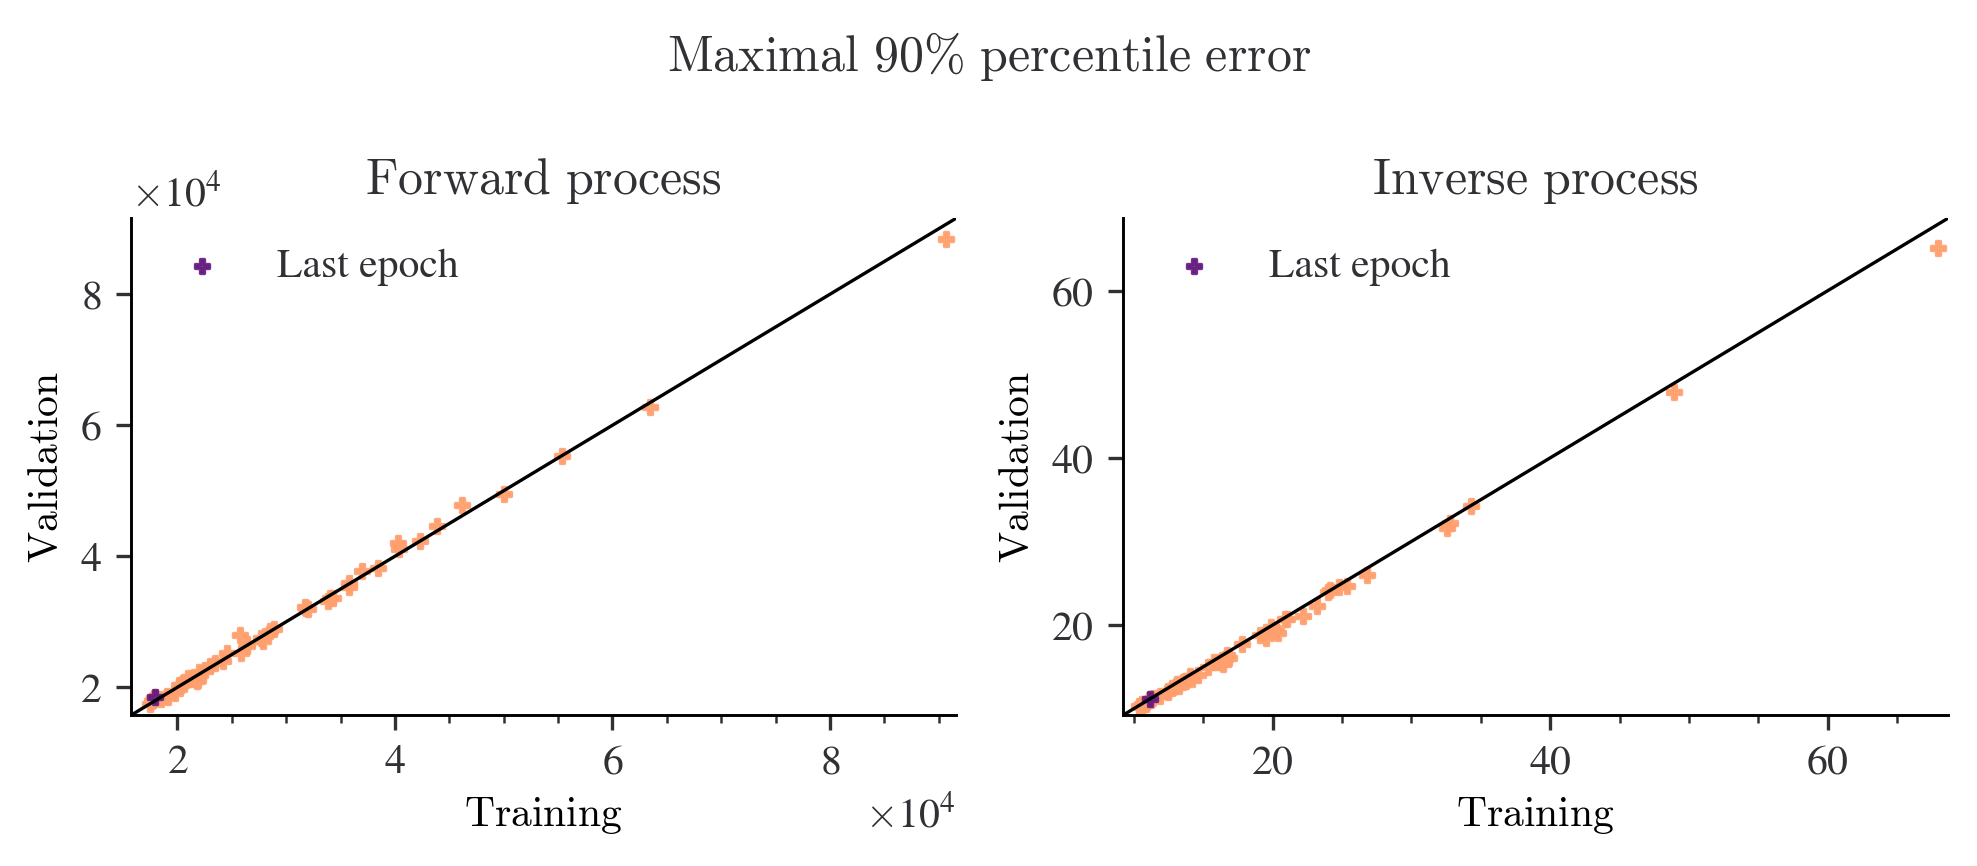

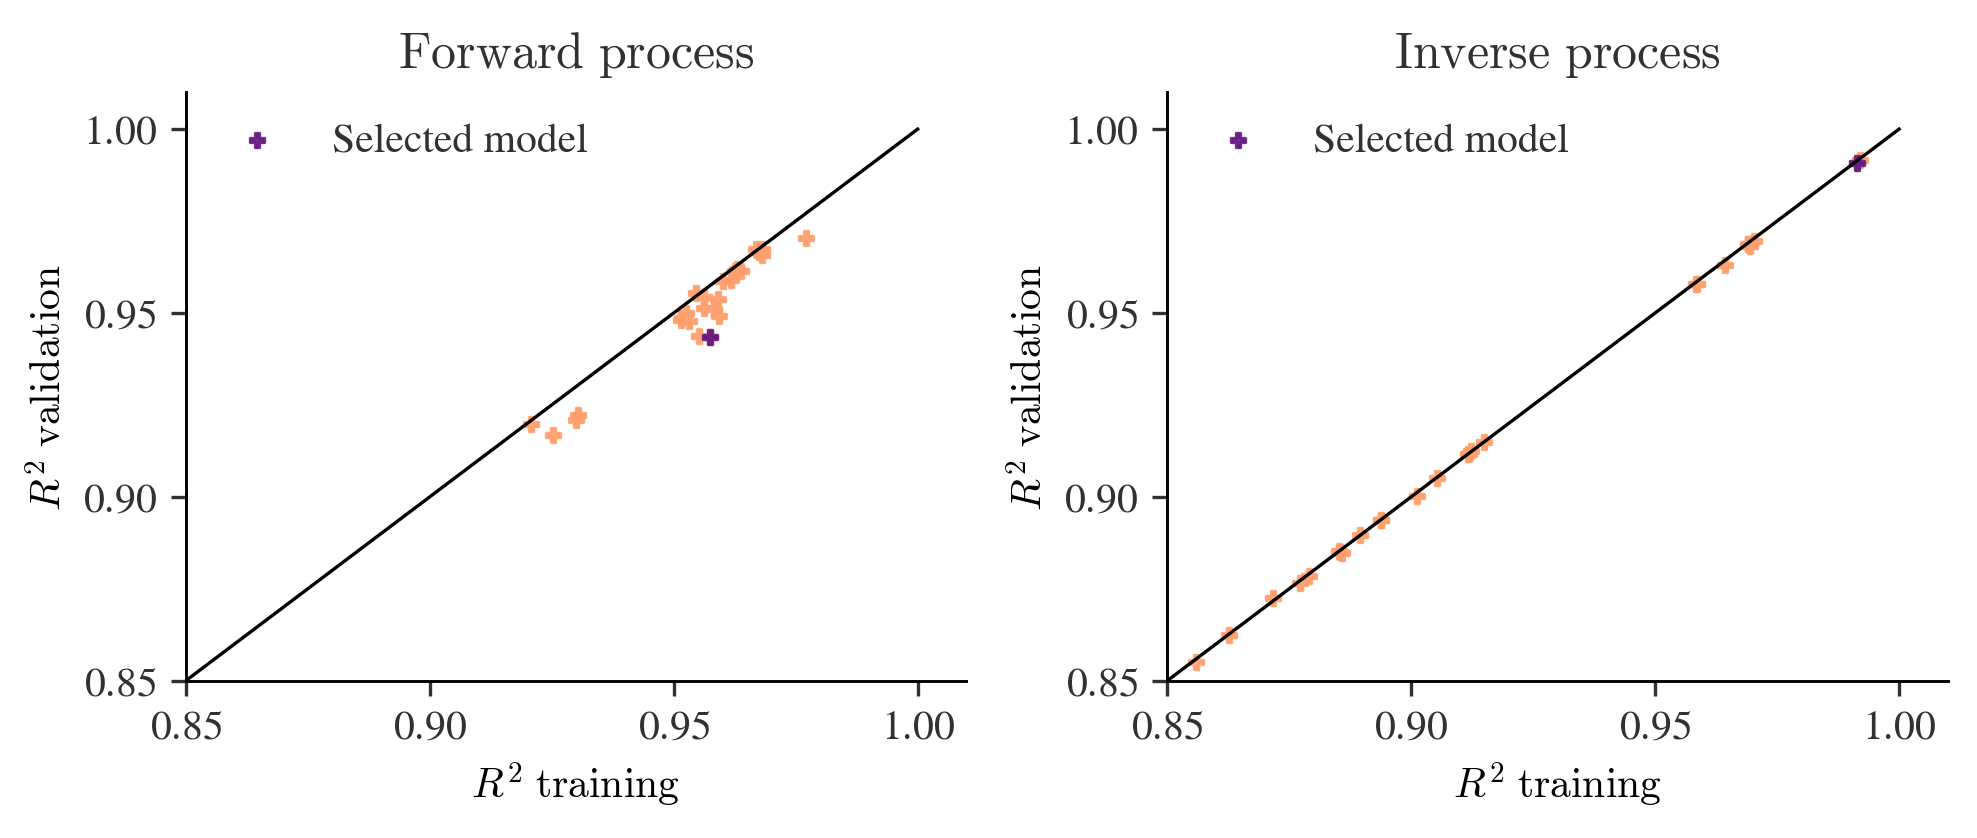

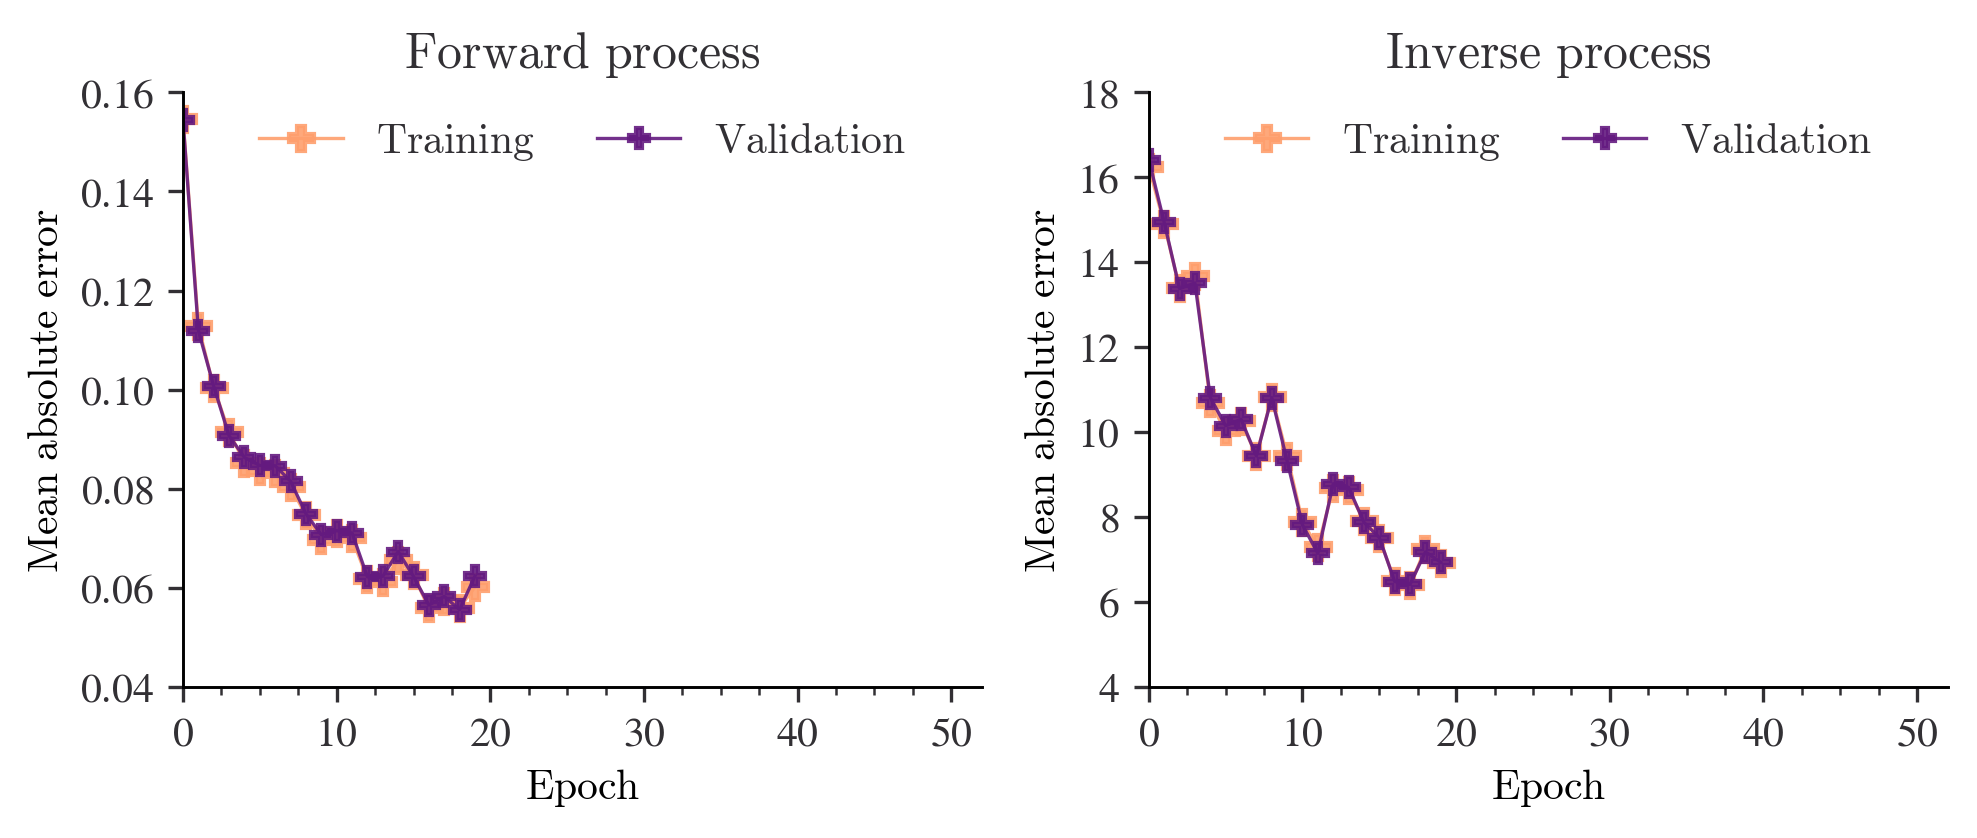

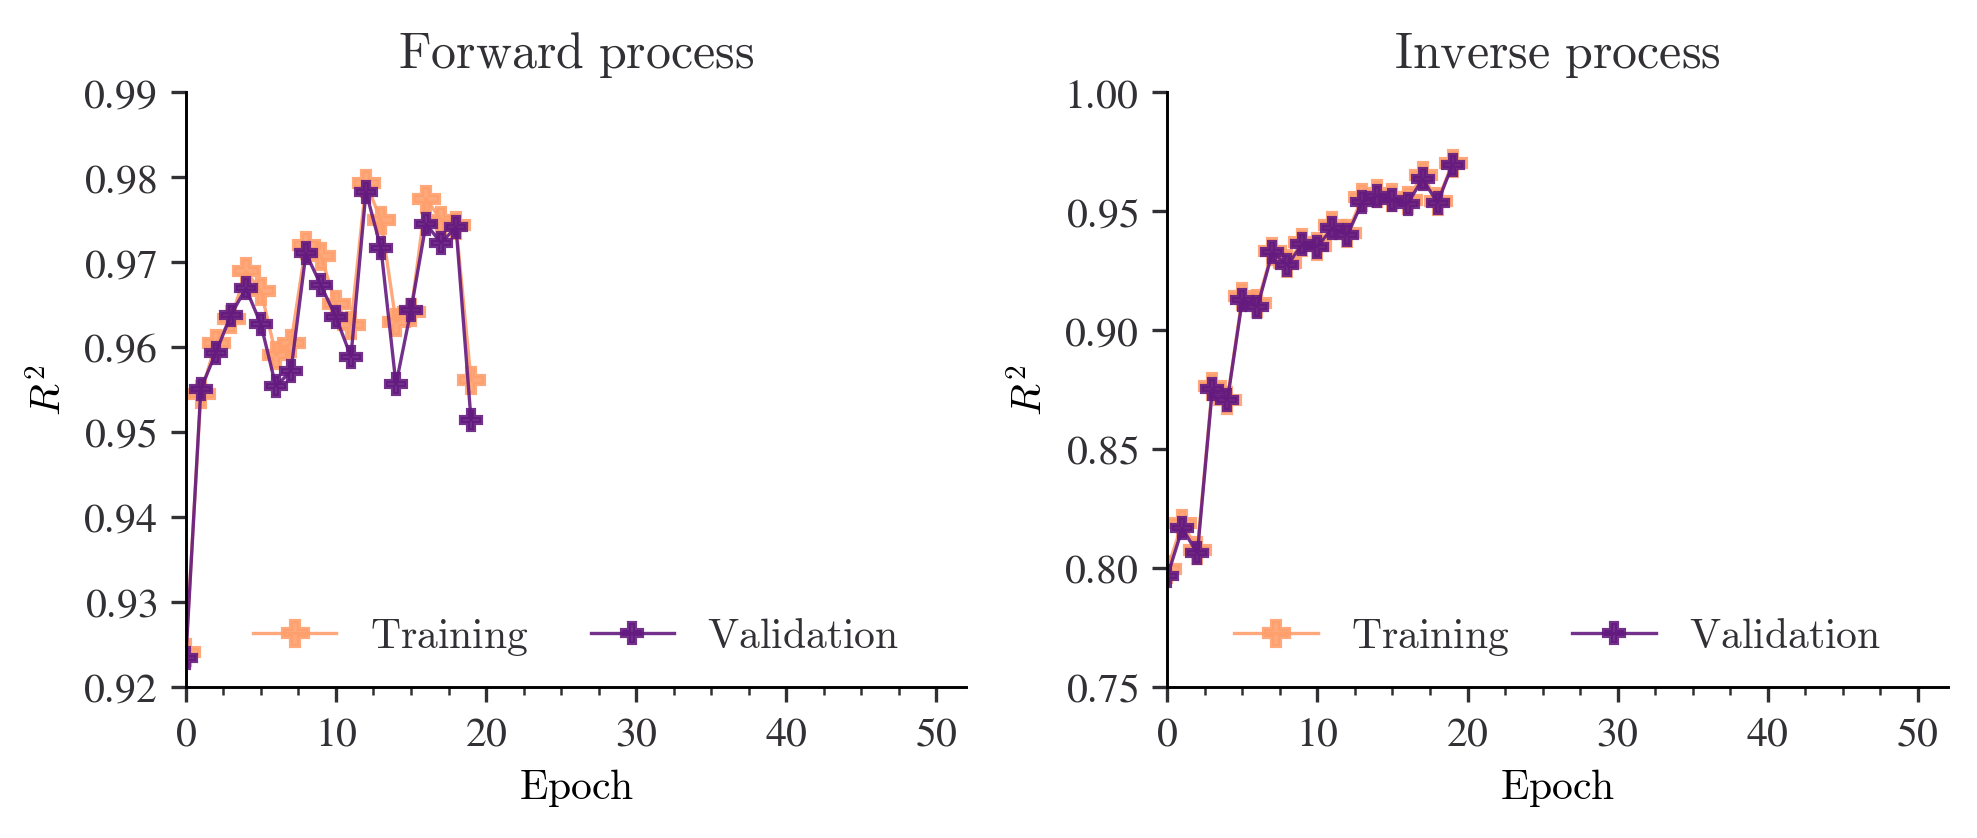

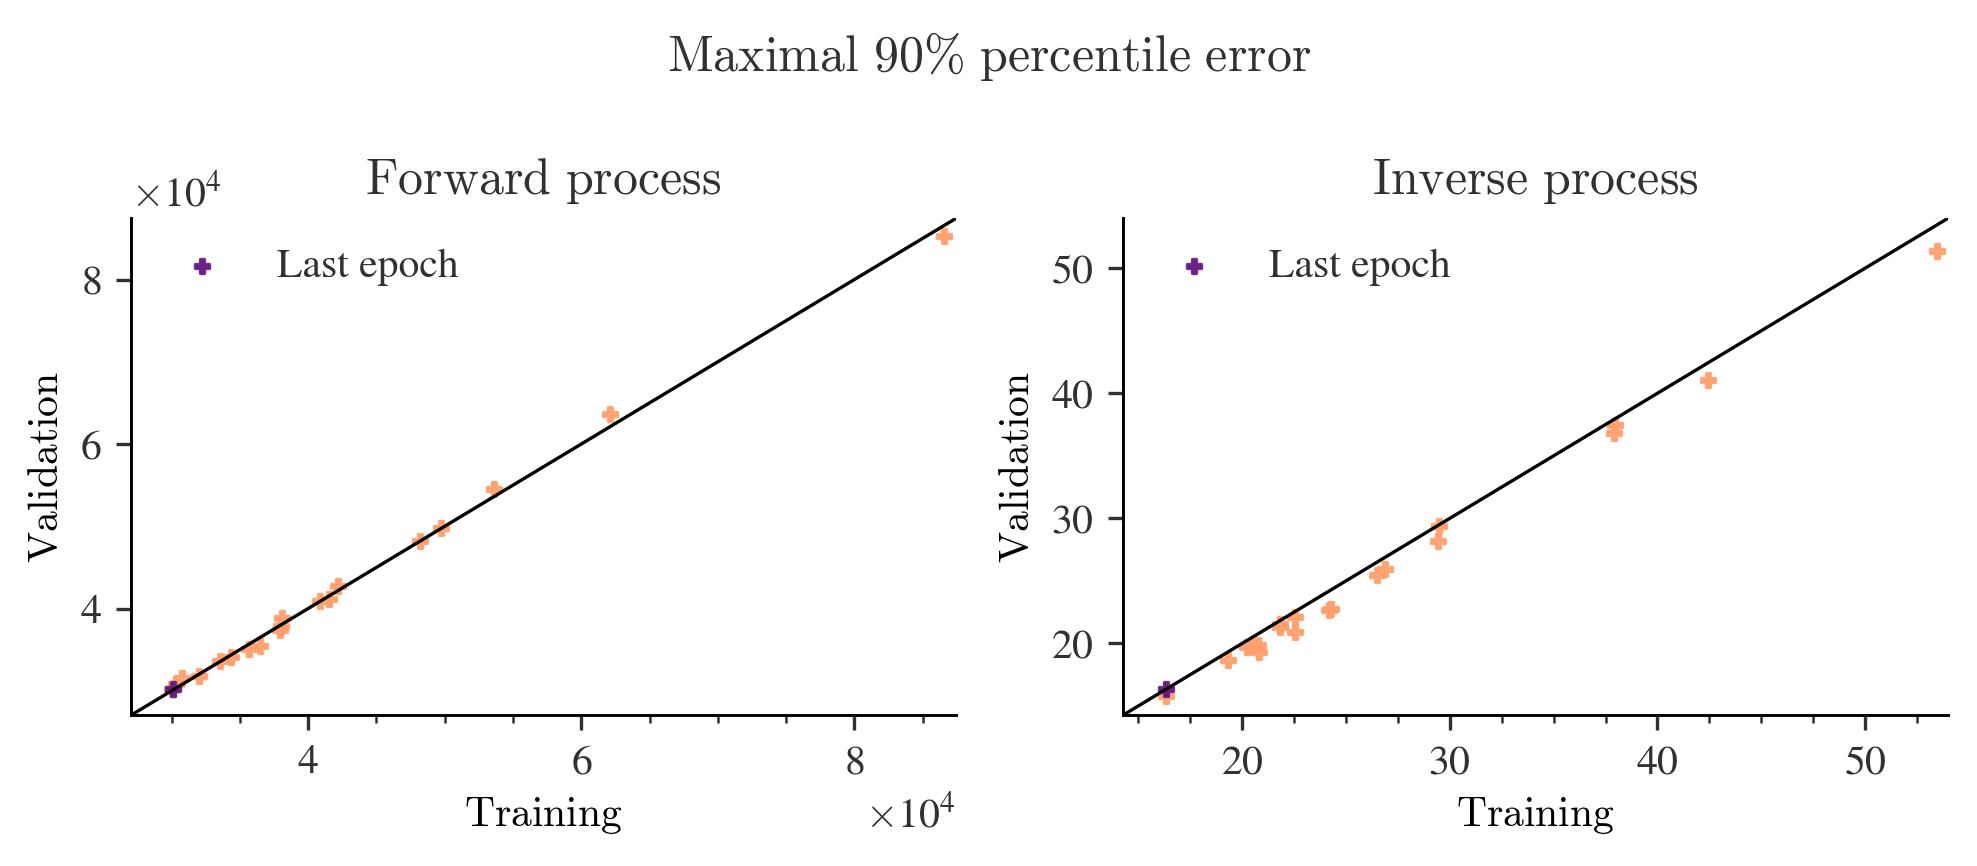

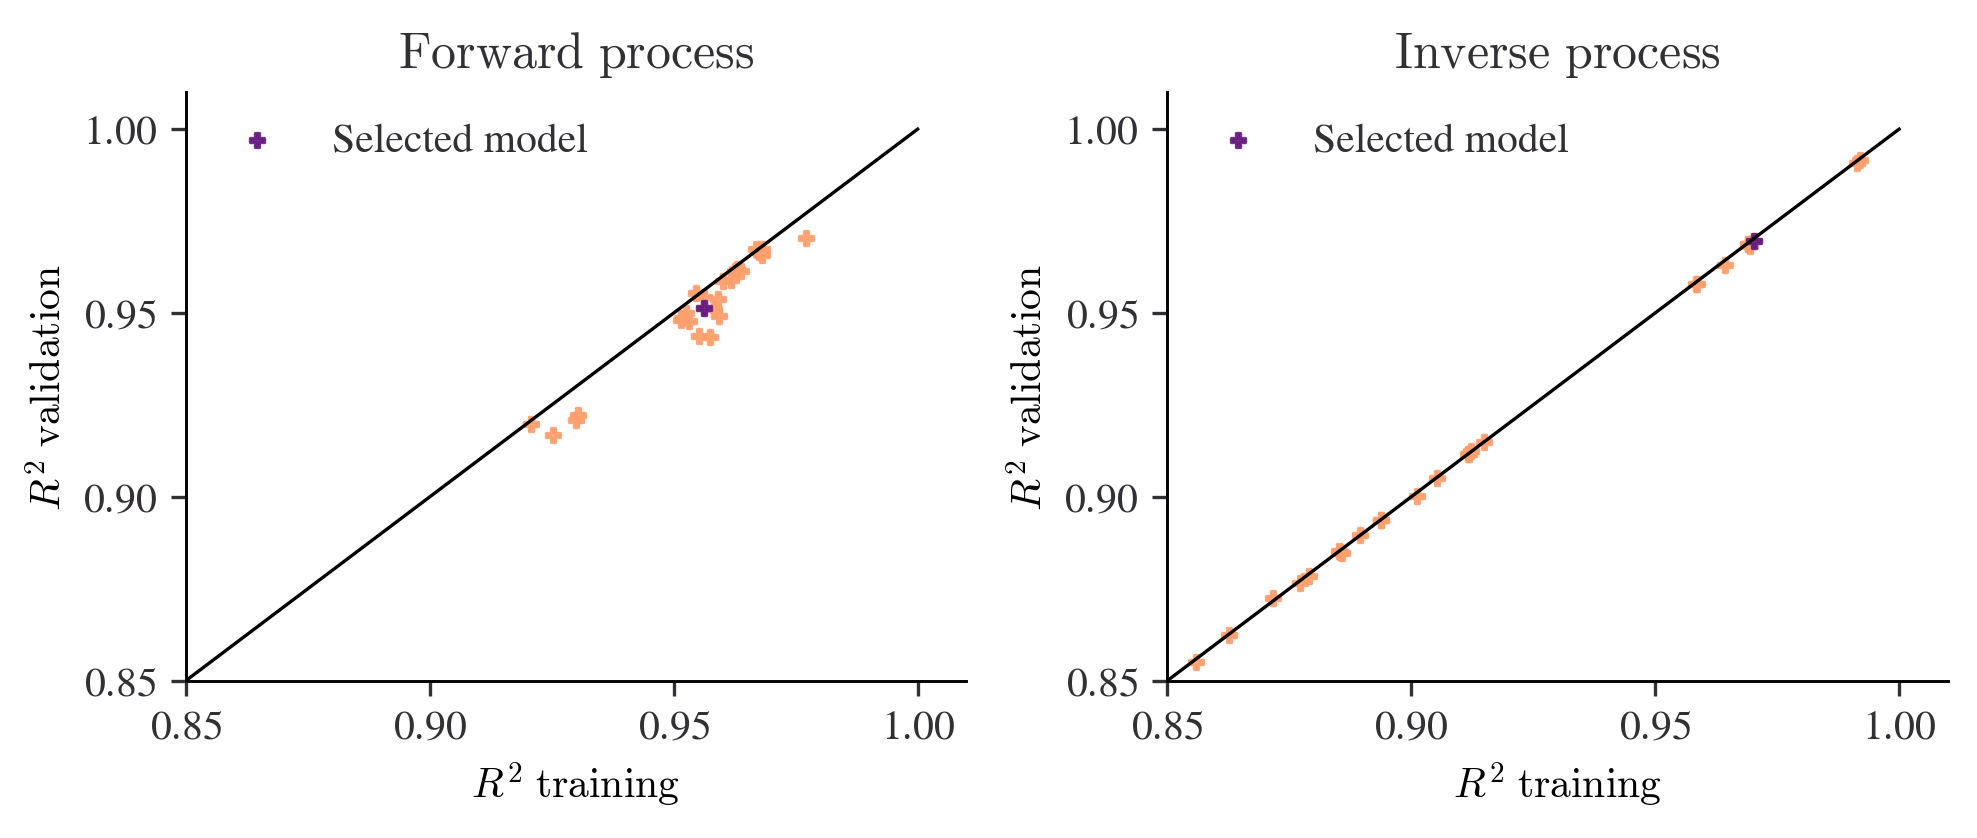

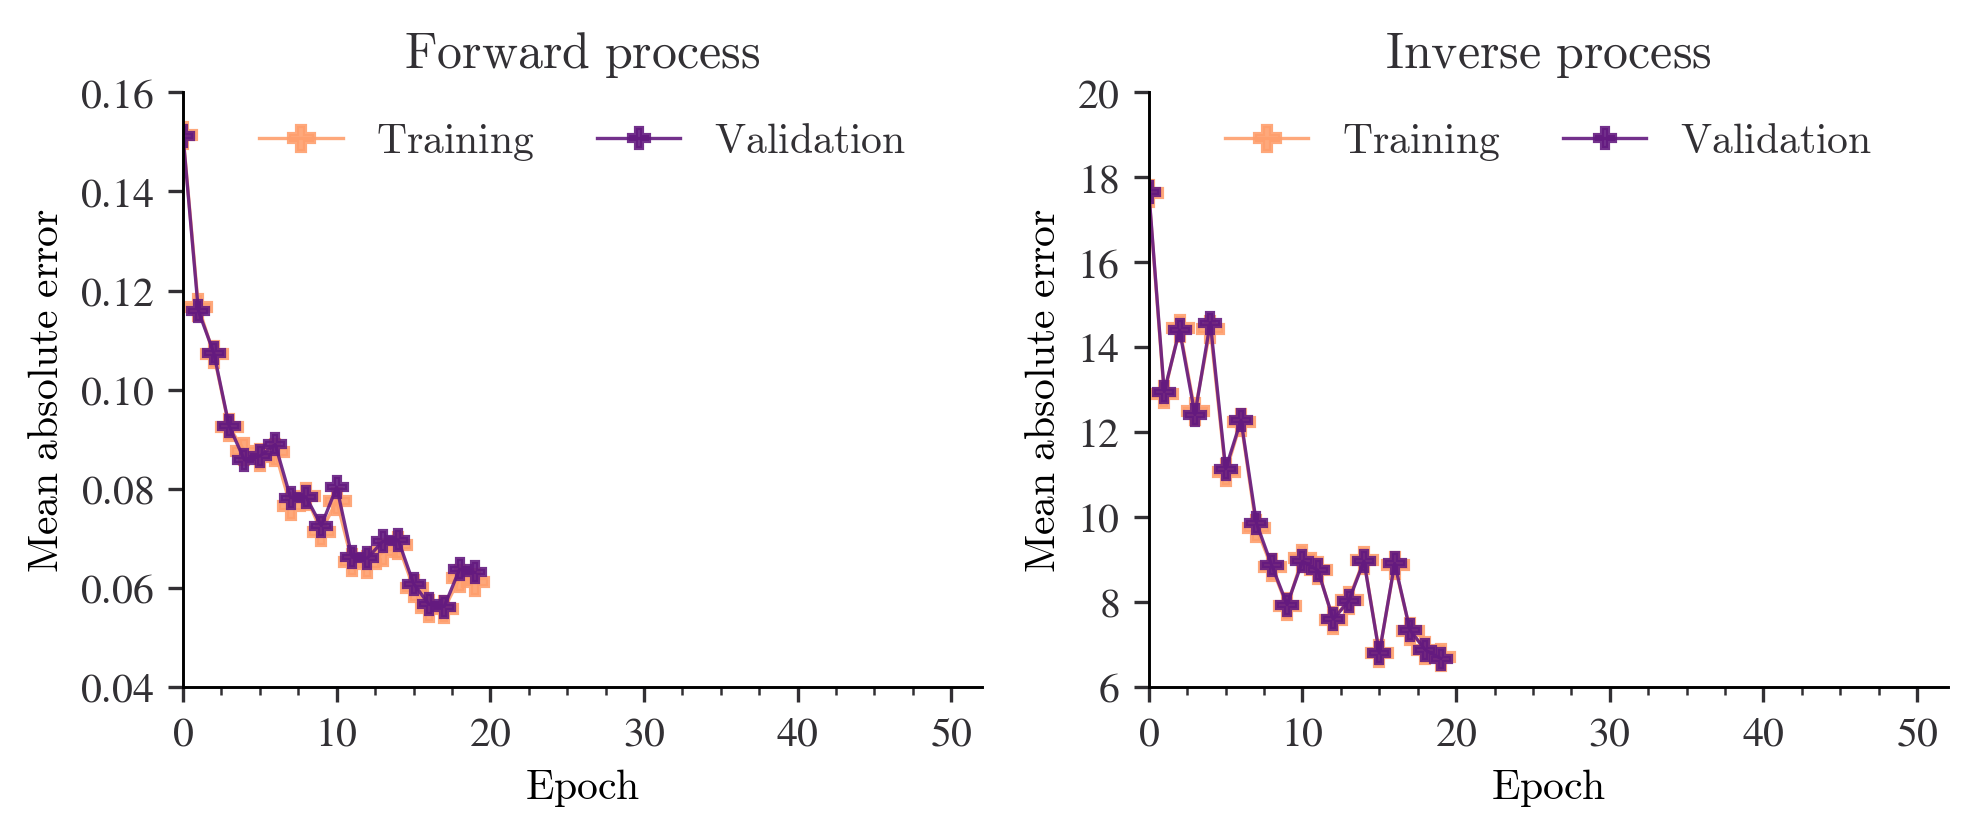

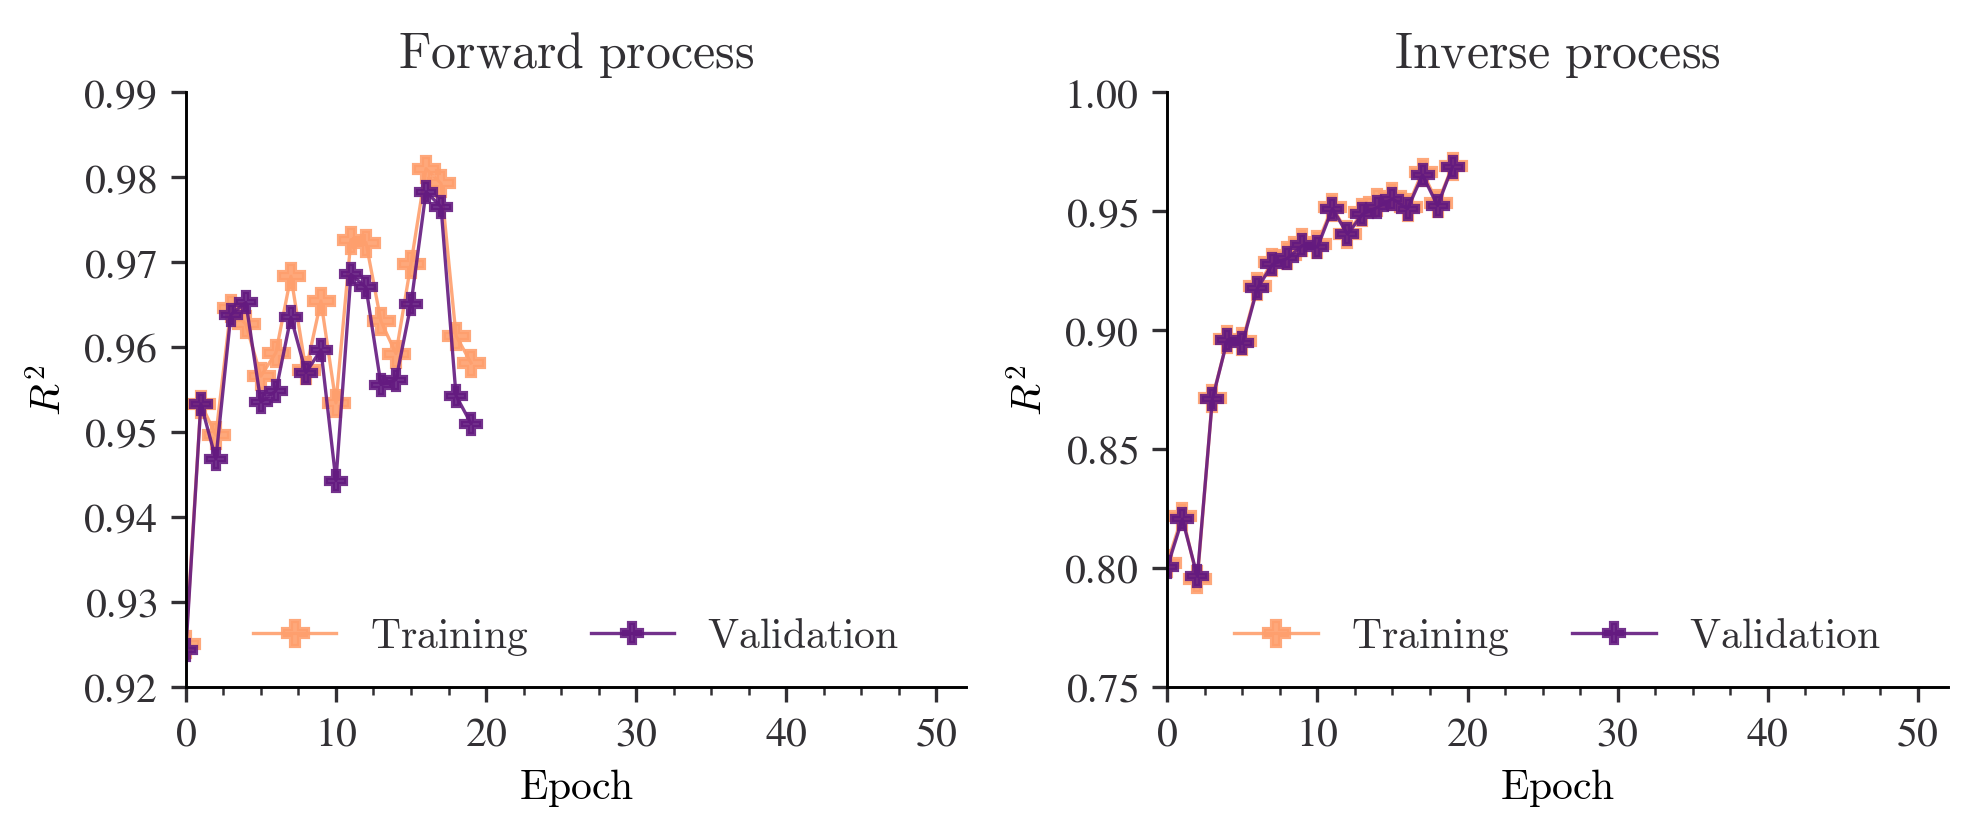

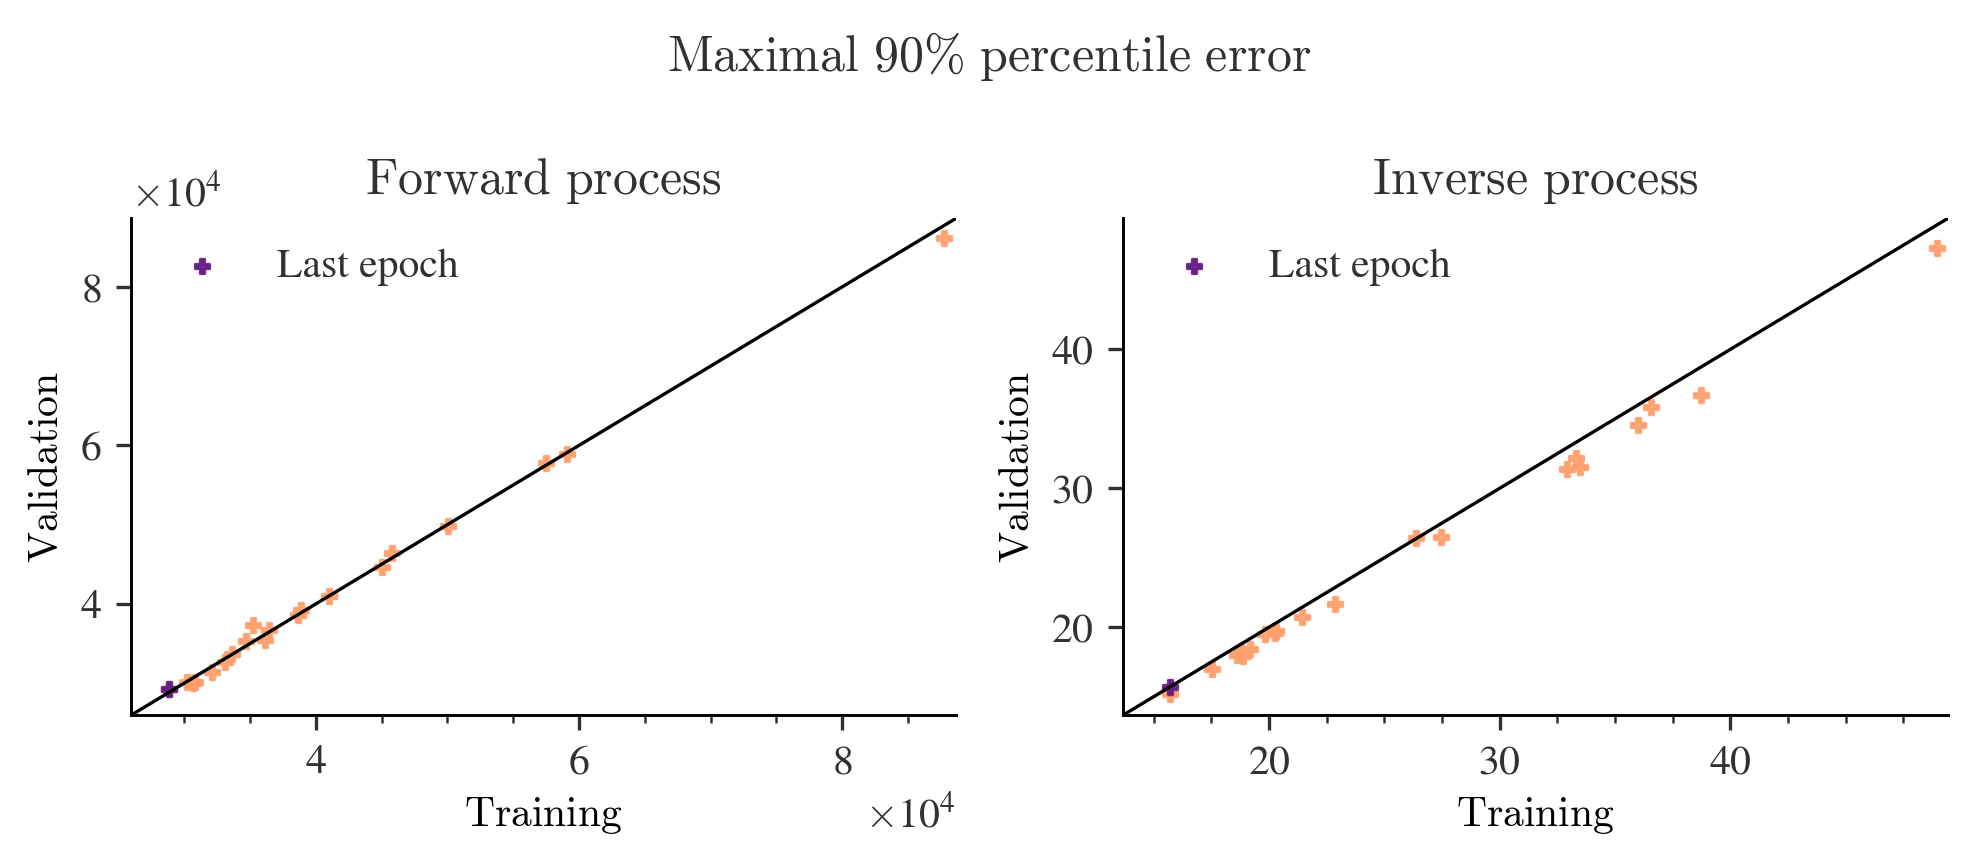

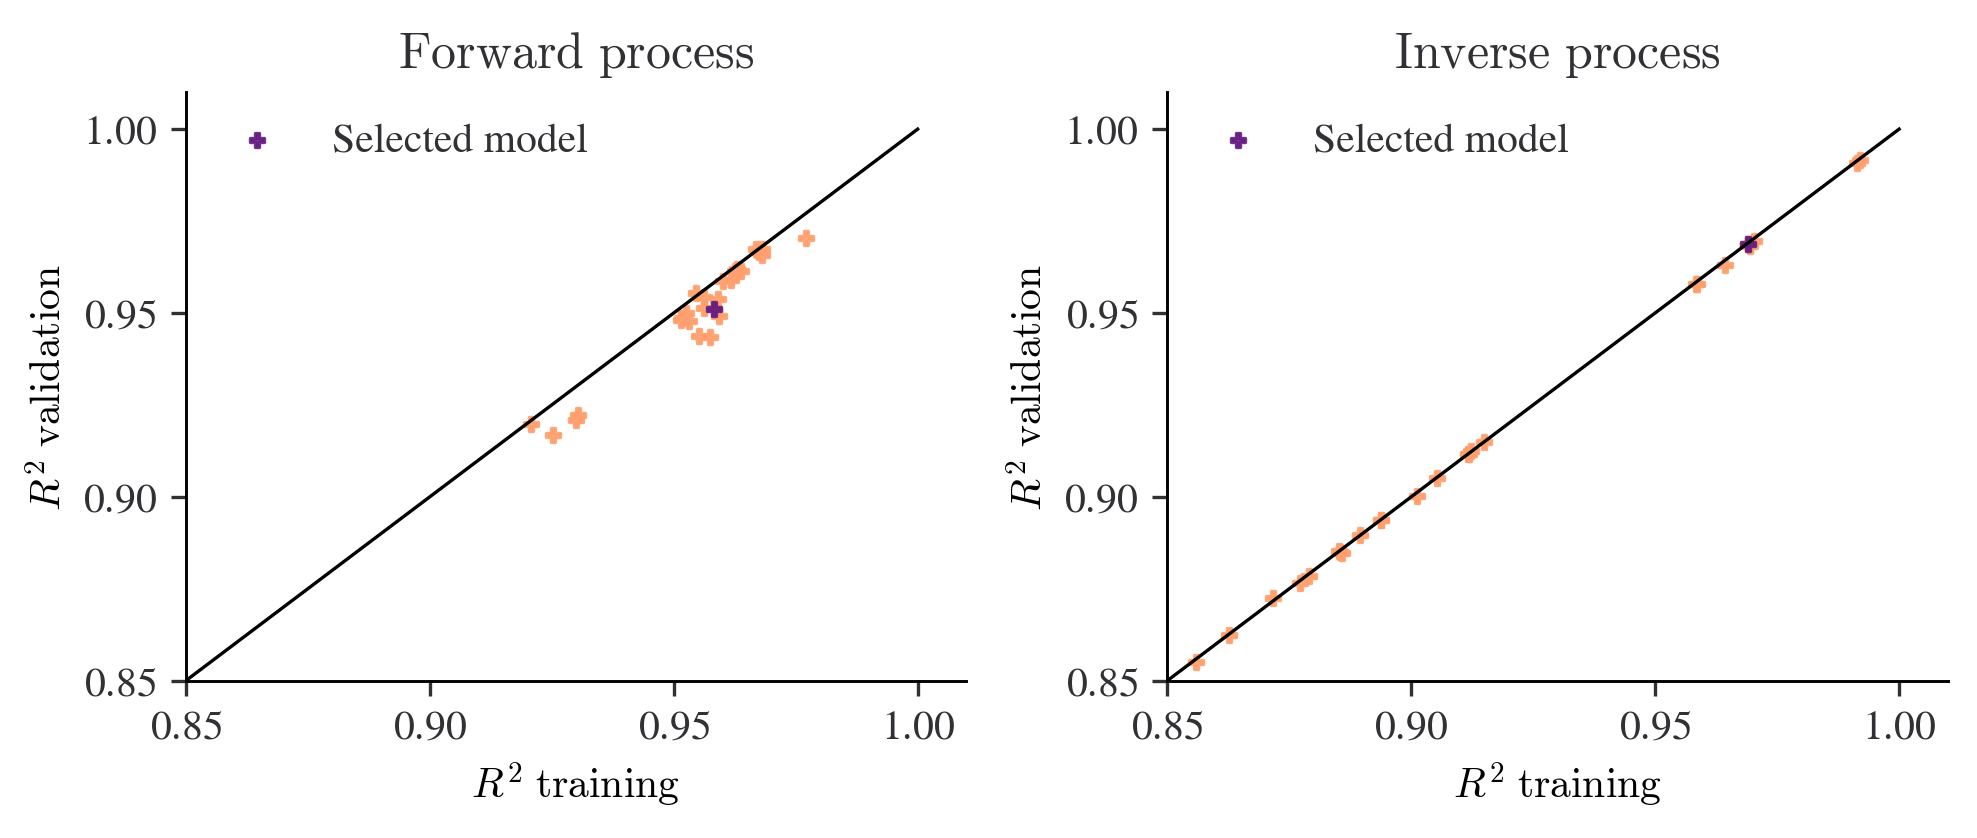

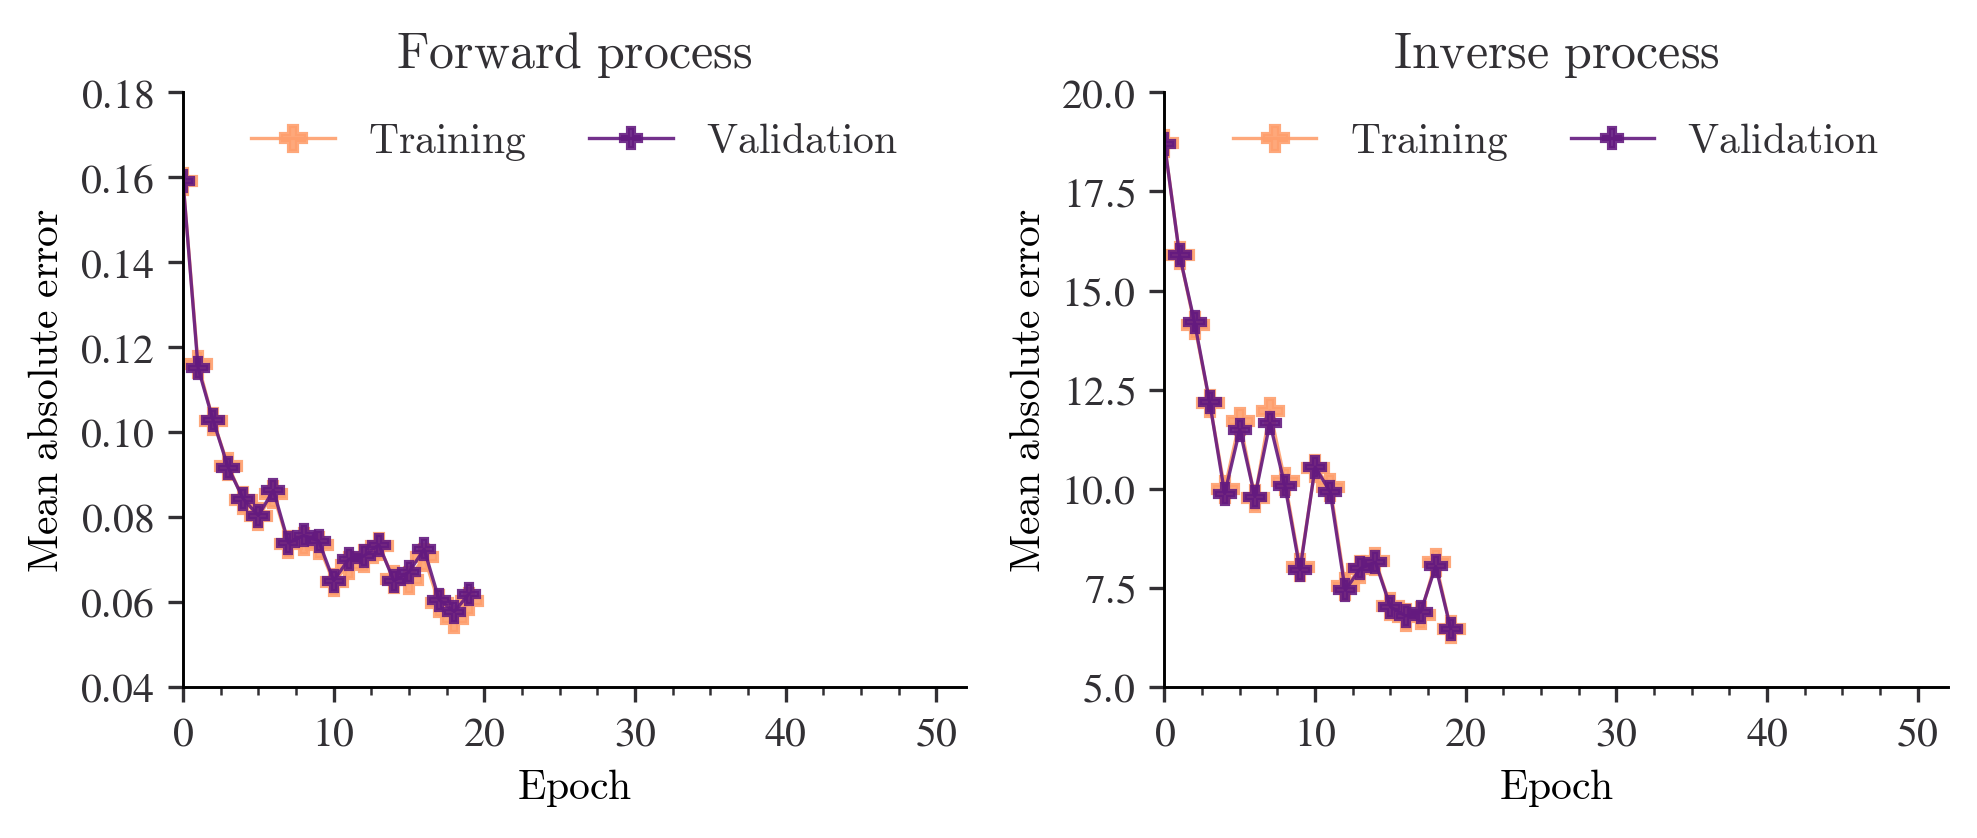

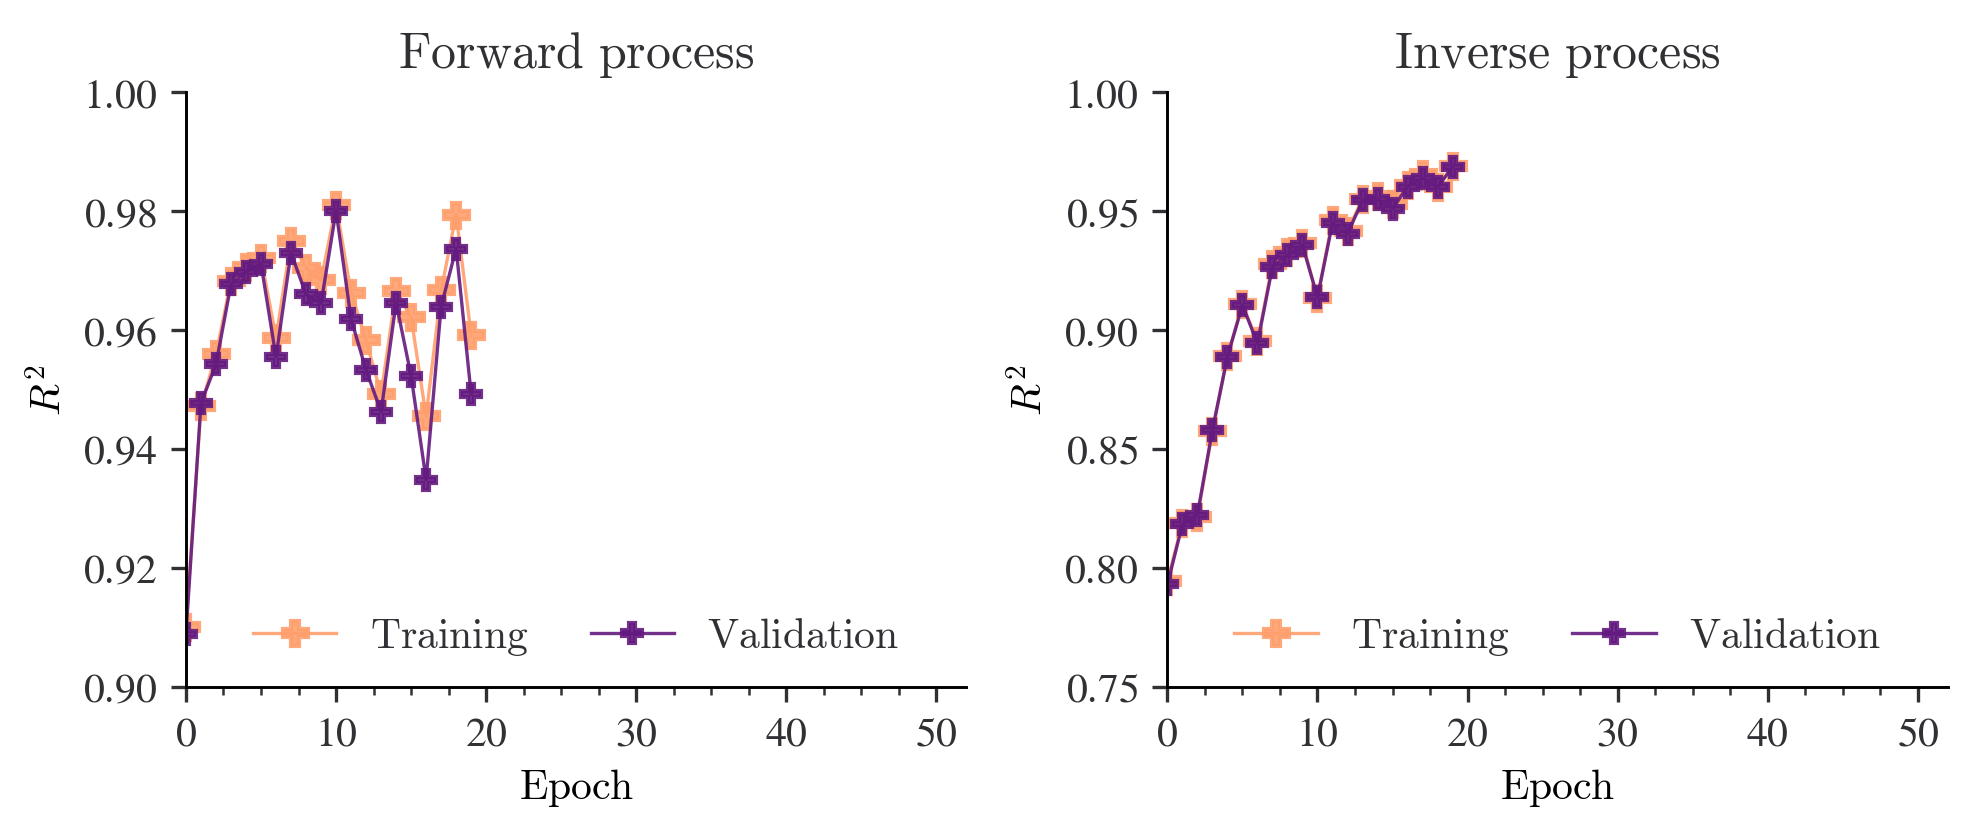

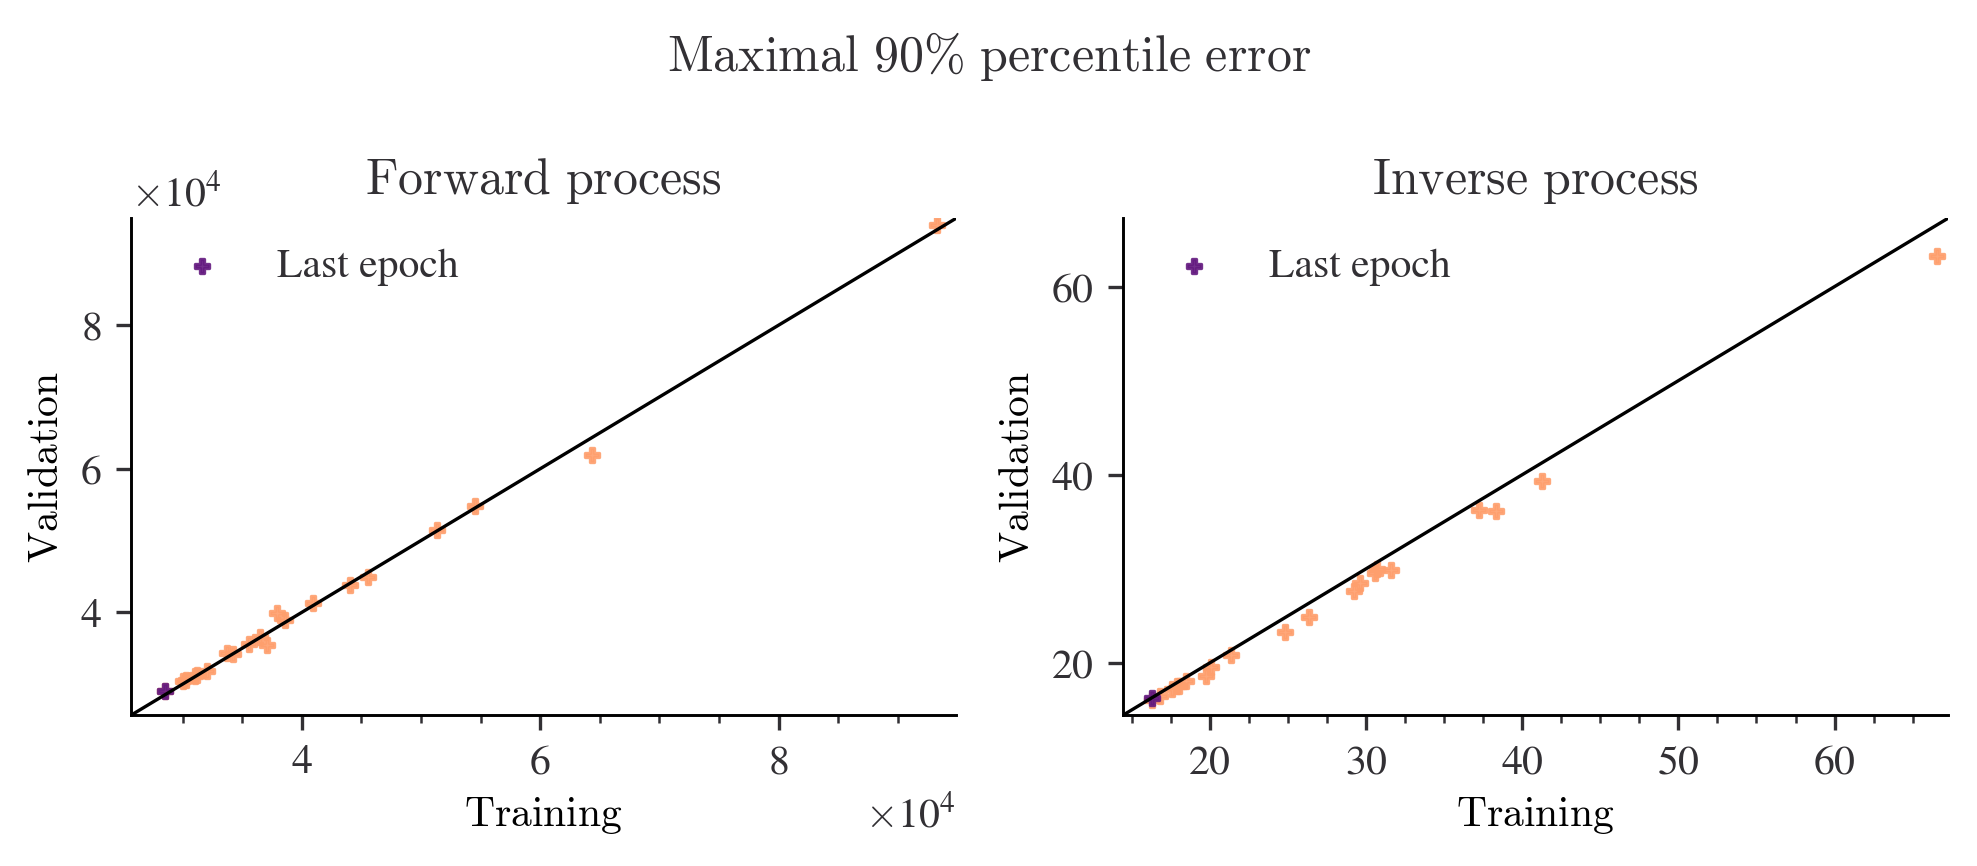

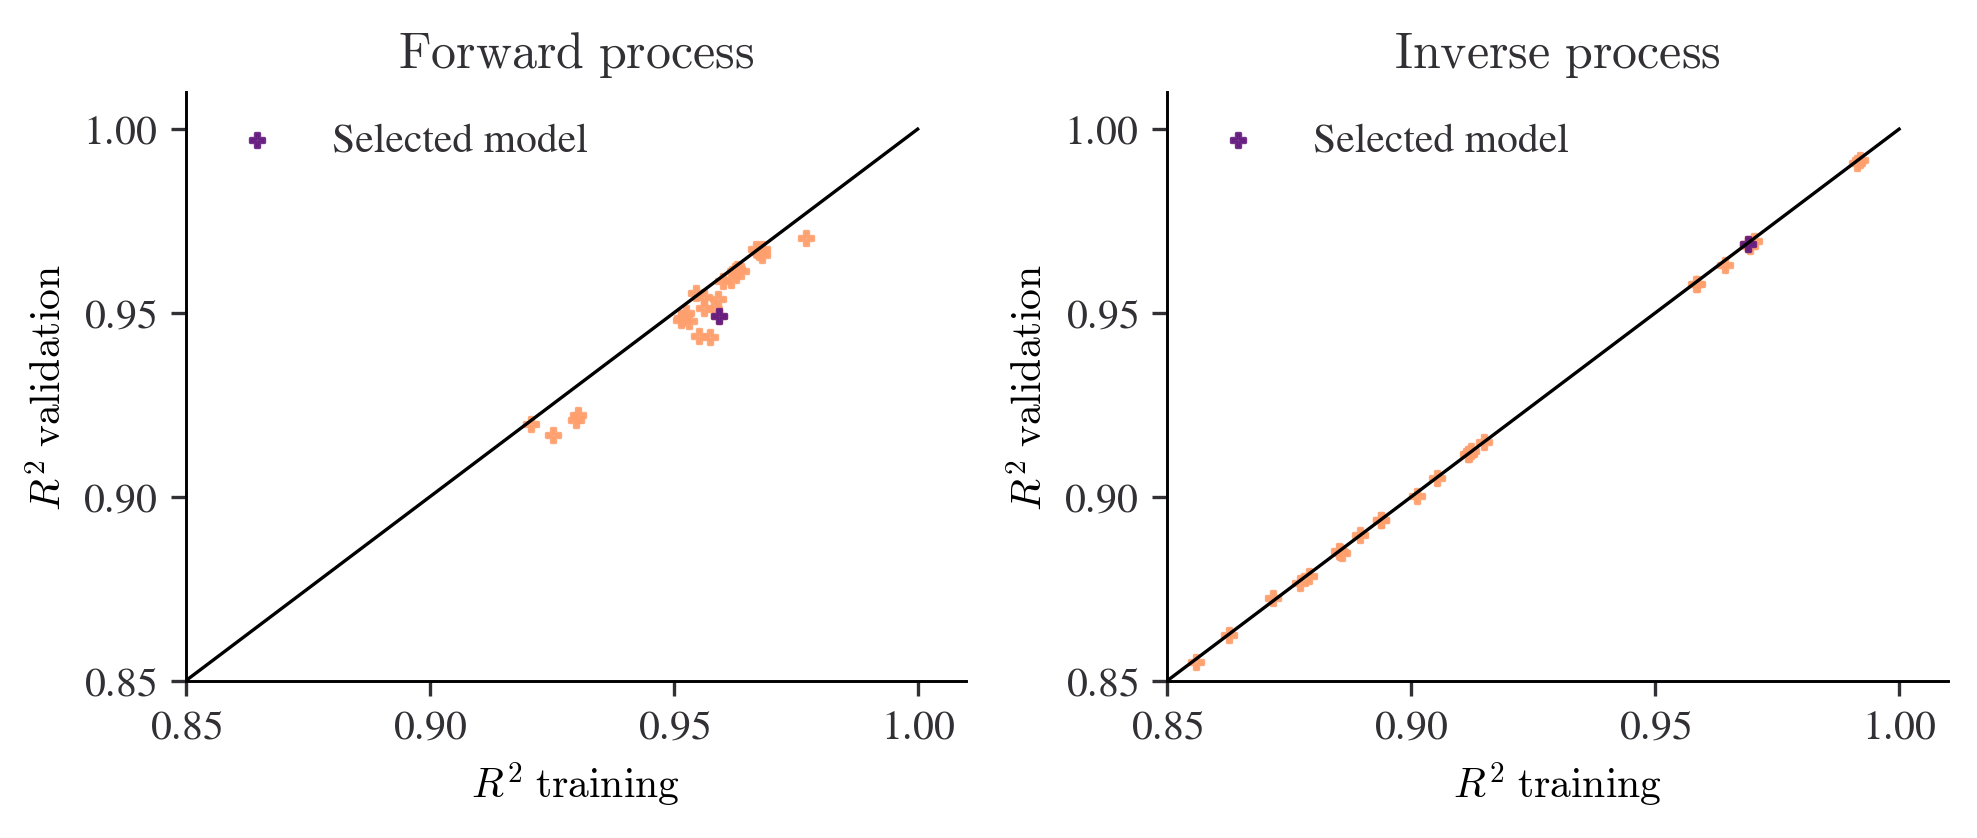

In [31]:
# Save best 5 models!
nmbr_best_models = 5
best_configs = [df.sort_values('r2_val_dvar', ascending=False).iloc[i, :] 
                for i in range(nmbr_best_models)]

# Figuresize
figsize = set_size(textwidth, subplots=(1, 2), rescale_height=1.4)
epoch_limits = [0, best_configs[0]['iterations_since_restore']+2]

for i in range(nmbr_best_models):
    # Select ith best model
    best_config = best_configs[i]
    best_model_dir = f'{best_config["logdir"]}/surrogate_model'

    # If first, call it model only
    if i==0:
        m_name = ''
    else: # Otherwise give it a number
        m_name = '_' + str(i)

    model_dir_i = model_dir + m_name
    
    # Create dir
    if not os.path.exists(model_dir_i):
        os.makedirs(model_dir_i)
    
    # Copy model to folder
    if not os.path.exists(model_dir_i + '/invertible_model'):    
        shutil.copytree(best_model_dir, f'{model_dir_i}/invertible_model')
    
    # Save config
    best_model_folder = best_config['trial_id']
    print(best_model_folder)
    best_model_hist = pd.read_csv(f'{result_dir}/histories/{best_model_folder}.csv', index_col=0)
    best_config_df = pd.DataFrame(best_config)
    best_config_df = best_config_df.T
    best_config_df.to_csv(f'{model_dir_i}/configs.csv')
    
    # Print out properties
    print('\nModel ' + m_name[1:])
    print('data_file:', os.path.basename(best_config['config/datafile']))
    print('batch_size:', best_config['config/batch_size'])
    print('learning_rate:', best_config['config/learning_rate'])
    print('n_blocks:', best_config['config/n_blocks'])
    print('n_depth:', best_config['config/n_depth'])
    print('n_width:', best_config['config/n_width'])
    print('epochs:', best_config['iterations_since_restore'])
    print('r2_adj_train:', np.round(best_config['r2_adj_train'], 3))
    print('r2_adj_val:', np.round(best_config['r2_adj_val'], 3))
    
    # Plot history of MAE
    fig, axs = plt.subplots(1, 2, figsize=figsize)
    #fig.suptitle("$\operatorname{Mean\ absolute\ errror}$")
    ax = axs[0]
    ax.plot(best_model_hist['MAE_train'], 'P-', label = '$\operatorname{Training}$', **train_marker)
    ax.plot(best_model_hist['MAE_val'], 'P-', label =  '$\operatorname{Validation}$', **val_marker)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel('$\operatorname{Epoch}$')
    ax.set_ylabel('$\operatorname{Mean\ absolute\ error}$')
    ax.set_xlim(epoch_limits)
    ax.set_title("$\operatorname{Forward\ process}$")
    ax.tick_params()
    ax.xaxis.set_minor_locator(AutoMinorLocator(4))    
    ax.legend(frameon=False, loc='upper center', ncol=2)
    ax = axs[1]
    ax.plot(best_model_hist['MAE_train_dvar'], 'P-', label = '$\operatorname{Training}$',
           **train_marker)
    ax.plot(best_model_hist['MAE_val_dvar'], 'P-', label =  '$\operatorname{Validation}$',
           **val_marker)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel('$\operatorname{Epoch}$')
    ax.set_xlim(epoch_limits)
    ax.set_ylabel('$\operatorname{Mean\ absolute\ error}$')
    ax.set_title("$\operatorname{Inverse\ process}$")
    ax.tick_params()
    ax.xaxis.set_minor_locator(AutoMinorLocator(4))
    ax.legend(frameon=False, loc='upper center', ncol=2)
    fig.tight_layout()
    fig.savefig(f'{plot_dir}/mae_model{m_name}.pdf', bbox_inches='tight')

    
    # Plot history of R2
    fig, axs = plt.subplots(1, 2, figsize=figsize)
    #fig.suptitle("$R^2$")
    ax = axs[0]
    ax.plot(best_model_hist['r2_train'], 'P-', label = '$\operatorname{Training}$', **train_marker)
    ax.plot(best_model_hist['r2_val'], 'P-', label =  '$\operatorname{Validation}$', **val_marker)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel('$\operatorname{Epoch}$')
    ax.set_ylabel('$R^2$')
    ax.set_xlim(epoch_limits)
    ax.set_title("$\operatorname{Forward\ process}$")
    ax.tick_params()
    ax.xaxis.set_minor_locator(AutoMinorLocator(4))    
    ax.legend(frameon=False, loc='lower center', ncol=2)
    ax = axs[1]
    ax.plot(best_model_hist['r2_train_dvar'], 'P-', label = '$\operatorname{Training}$',
           **train_marker)
    ax.plot(best_model_hist['r2_val_dvar'], 'P-', label =  '$\operatorname{Validation}$',
           **val_marker)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel('$\operatorname{Epoch}$')
    ax.set_ylabel('$R^2$') #, rotation=90)
    ax.set_xlim(epoch_limits)
    ax.set_title("$\operatorname{Inverse\ process}$")
    ax.tick_params()
    ax.xaxis.set_minor_locator(AutoMinorLocator(4))
    ax.legend(frameon=False, loc='lower center', ncol=2)
    fig.tight_layout()
    fig.savefig(f'{plot_dir}/r2_model{m_name}.pdf', bbox_inches='tight')
    
    # Plot history of PERCENTILE
    fig, axs = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle("$\operatorname{Maximal}\ 90 \%\ \operatorname{percentile\ error}$")
    ax = axs[0]
    ax.plot([-1.5, 100_000], [-1.5, 100_000], color='black')
    ax.scatter(best_model_hist['90_percentile_max_error_train'], best_model_hist['90_percentile_max_error_val'],
               color=color[0], **scat_style)
    ax.scatter(best_model_hist['90_percentile_max_error_train'].to_numpy()[-1], 
               best_model_hist['90_percentile_max_error_val'].to_numpy()[-1],
               label="Last epoch",               
               color=color[1], **scat_style)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel('$\operatorname{Training}$')
    ax.legend(frameon=False, loc='upper left')
    ax.set_ylabel('$\operatorname{Validation}$')
    ax.set_title("$\operatorname{Forward\ process}$")
    ax.set_xlim(left=min(np.min(best_model_hist['90_percentile_max_error_train']), 
                         np.min(best_model_hist['90_percentile_max_error_val']))*0.9,
                right=max(np.max(best_model_hist['90_percentile_max_error_train']), 
                          np.max(best_model_hist['90_percentile_max_error_val']))*1.01)   
    ax.set_ylim(bottom=min(np.min(best_model_hist['90_percentile_max_error_train']), 
                         np.min(best_model_hist['90_percentile_max_error_val']))*0.9,
                top=max(np.max(best_model_hist['90_percentile_max_error_train']), 
                          np.max(best_model_hist['90_percentile_max_error_val']))*1.01)       
    ax.tick_params()
    ax.xaxis.set_minor_locator(AutoMinorLocator(4))
    #ax.legend()
    ax = axs[1]
    ax.plot([-1.5, 100], [-1.5, 100], color='black')
    ax.scatter(best_model_hist['90_percentile_max_error_train_dvar'], best_model_hist['90_percentile_max_error_val_dvar'],
               color=color[0], **scat_style)
    ax.scatter(best_model_hist['90_percentile_max_error_train_dvar'].to_numpy()[-1], 
               best_model_hist['90_percentile_max_error_train_dvar'].to_numpy()[-1],
               label="Last epoch",
               color=color[1], **scat_style) 
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.legend(frameon=False, loc='upper left')
    ax.set_xlabel('$\operatorname{Training}$')
    ax.set_ylabel('$\operatorname{Validation}$')
    ax.set_title("$\operatorname{Inverse\ process}$")
    ax.set_xlim(left=min(np.min(best_model_hist['90_percentile_max_error_train_dvar']), 
                         np.min(best_model_hist['90_percentile_max_error_val_dvar']))*0.9,
                right=max(np.max(best_model_hist['90_percentile_max_error_train_dvar']), 
                          np.max(best_model_hist['90_percentile_max_error_val_dvar']))*1.01)
    ax.set_ylim(bottom=min(np.min(best_model_hist['90_percentile_max_error_train_dvar']), 
                         np.min(best_model_hist['90_percentile_max_error_val_dvar']))*0.9,
                top=max(np.max(best_model_hist['90_percentile_max_error_train_dvar']), 
                          np.max(best_model_hist['90_percentile_max_error_val_dvar']))*1.01)
    ax.tick_params()
    ax.xaxis.set_minor_locator(AutoMinorLocator(4))    
    #ax.legend()
    fig.tight_layout()
    fig.savefig(f'{plot_dir}/90_percentile_model{m_name}.pdf', bbox_inches='tight')
    
    # History R^2
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    ax_limes = [0.85, 1.01]
    # fig.suptitle("$R^2\ \operatorname{value\ of\ models\ found\ in\ hyperparameterscan}$")

    ax = axs[0]
    #sns.scatterplot(data=df, x='r2_train', y='r2_val', ax=ax)
    ax.scatter(df['r2_train'], df['r2_val'], color=color[0], **scat_style)
    ax.scatter(best_config['r2_train'], best_config['r2_val'], color=color[1], 
               label="Selected model", **scat_style)
    ax.plot([-1.5, 1.], [-1.5, 1.], color='black')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel(r'$R^2$ $\operatorname{training}$ ')
    ax.set_ylabel(r'$R^2$ $\operatorname{validation}$')
    ax.set_title("$\operatorname{Forward\ process}$")
    ax.tick_params()
    ax.set_xlim(ax_limes)
    ax.set_ylim(ax_limes)
    ax.legend(loc='upper left', frameon=False)
    ax = axs[1]
    ax.scatter(df['r2_train_dvar'], df['r2_val_dvar'], color=color[0], **scat_style)
    ax.scatter(best_config['r2_train_dvar'], best_config['r2_val_dvar'], color=color[1], 
               label="Selected model", **scat_style)
    ax.plot([-1.5, 1.], [-1.5, 1.], color='black')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title("$\operatorname{Inverse\ process}$")
    ax.set_xlabel(r'$R^2$ $\operatorname{training}$ ')
    ax.set_ylabel(r'$R^2$ $\operatorname{validation}$')
    ax.tick_params()
    ax.set_xlim(ax_limes)
    ax.set_ylim(ax_limes)
    ax.legend(loc='upper left', frameon=False)

    fig.tight_layout()
    fig.savefig(f'{plot_dir}/R2_generalisation_hs{m_name}.pdf')
    
    best_model_readable = (pd.DataFrame(best_config[[*column_names]]).T).rename(columns=column_names)

    with open(f'{plot_dir}/tables{m_name}.tex', 'w') as tf:
        tf.write(best_model_readable.to_latex(caption="Best model", position='H', header=True,
                                              index=False, escape=False))
        tf.write(((pd.DataFrame(np.round(np.array(best_config[[*column_names_scores_fw]],
                                          dtype='float'), decimals=4)).T).set_axis(list(column_names_scores_fw.values()), axis=1)
                 ).to_latex(caption="Best model fw", position='H', header=True, index=False, escape=False))
        tf.write(((pd.DataFrame(np.round(np.array(best_config[[*column_names_scores_iv]],
                                                  dtype='float'), decimals=4)).T).set_axis(list(column_names_scores_iv.values()), axis=1)
                 ).to_latex(caption="Best model inverse", position='H', header=True, index=False, escape=False))

In [29]:
best_model_dir

'/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/paper_results_scan_AAE/version1/ASHA_invertible_id/train_invertible_model_57eb7_00024_24_nominal_dimension=1082,weight_reconstruction=258,weight_x=142,weight_z=339_2021-07-15_09-29-09/surrogate_model'